* A pipeline to which you feed an mri image and spits out muscle predictions and lever arms.

In [1]:
%reset -f
%load_ext autoreload
%autoreload 2
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8
from custom_imports import *

In [40]:
m11 = tf.keras.models.load_model("../data/models/new_era.v03.11muscles.h5")
m9  = tf.keras.models.load_model("../data/models/new_era.v02.9muscles.h5")

In [3]:
image_dir = "../data/mri_analysis/"

In [4]:
all_images = glob.glob(f"{image_dir}/**/*jpg", recursive=True)
non_raw_images = [x for x in all_images if '/raw/' not in x.lower()]
raw_images = [x for x in all_images if '/raw/' in x.lower()]
len(non_raw_images), len(raw_images)

(832, 832)

../data/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Female/Subject F7/Raw/2-COF7-7:16RepPreRaw.jpg


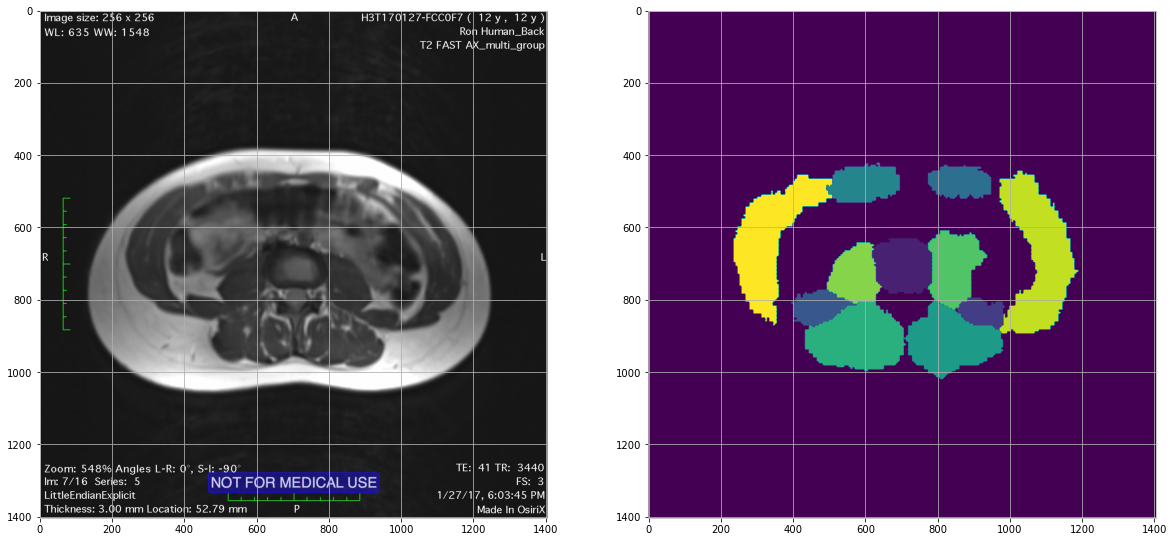

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
file = np.random.choice(raw_images)
# file = "../data/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Male/Subject M1B/Raw/1-COM1B-2:16PostRaw.jpg"
print(file)
img = cv2.imread(file)
res = predict_image(m11, img)
axes[0].imshow(img)
axes[1].imshow(res)

In [38]:
from mri_project.utility import MriImage
# namedtuple("MriImage", "id raw_image traced_image muscle_contours predicted_muscles predicted_muscle_contours")

In [39]:
raw_nonraw = list(zip(sorted(raw_images), sorted(non_raw_images)))

In [40]:
from mri_project.utility import dfe
from uuid import uuid4
savedir = "../data/images_with_predictions_v02/"
if os.path.exists(savedir):
    shutil.rmtree(savedir)
os.mkdir(savedir)
    
for raw, nonraw in raw_nonraw:
    d, f, e = dfe(raw)
    raw_image = cv2.imread(raw)
    non_raw_image = cv2.imread(nonraw)
    data = {
        'id': raw,
        'raw_image': raw_image,
        'traced_image': non_raw_image,
        'predicted_muscles': 
             {'9_muscle': predict_image(m9, raw_image), '11_muscle': predict_image(m11, raw_image)},
    }
    savefile = savedir+f+".dict"
    print(savefile)
    if os.path.exists(savefile):
        savefile += str(uuid4)[:4]
    joblib.dump(data, savefile)

../data/images_with_predictions_v02/1-COF1B-2:16PostRaw.dict
../data/images_with_predictions_v02/2-COF1B-7:16PostRaw.dict
../data/images_with_predictions_v02/3-COF1B-11:16PostRaw.dict
../data/images_with_predictions_v02/4-COF1B-15:16PostRaw.dict
../data/images_with_predictions_v02/1-COF2B-4:16PostRaw.dict
../data/images_with_predictions_v02/2-COF2B-7:16PostRaw.dict
../data/images_with_predictions_v02/3-COF2B-11:16PostRaw.dict
../data/images_with_predictions_v02/4-COF2B-15:16PostRaw.dict
../data/images_with_predictions_v02/1-COF3B-2:16PostRaw.dict
../data/images_with_predictions_v02/2-COF3B-7:16PostRaw.dict
../data/images_with_predictions_v02/3-COF3B-10:16PostRaw.dict
../data/images_with_predictions_v02/4-COF3B-14:16PostRaw.dict
../data/images_with_predictions_v02/1-COF4B-3:16PostRaw.dict
../data/images_with_predictions_v02/2-COF4B-7:16PostRaw.dict
../data/images_with_predictions_v02/3-COF4B-10:16PostRaw.dict
../data/images_with_predictions_v02/4-COF4B-15:16PostRaw.dict
../data/images_w

../data/images_with_predictions_v02/1-WM3B-3:16PostRaw.dict
../data/images_with_predictions_v02/2-WM3B-6:16PostRaw.dict
../data/images_with_predictions_v02/3-WM3B-11:16PostRaw.dict
../data/images_with_predictions_v02/4-WM3B-14:16PostRaw.dict
../data/images_with_predictions_v02/1-WM4B-3:16PostRaw.dict
../data/images_with_predictions_v02/2-WM4B-7:16PostRaw.dict
../data/images_with_predictions_v02/3-WM4B-10:16PostRaw.dict
../data/images_with_predictions_v02/4-WM4B-14:16PostRaw.dict
../data/images_with_predictions_v02/1-WM6B-2:16PostRaw.dict
../data/images_with_predictions_v02/2-WM6B-7:16PostRaw.dict
../data/images_with_predictions_v02/3-WM6B-11:16PostRaw.dict
../data/images_with_predictions_v02/4-WM6B-14:16PostRaw.dict
../data/images_with_predictions_v02/1-WM8B-3:16PostRaw.dict
../data/images_with_predictions_v02/2-WM8B-7:16PostRaw.dict
../data/images_with_predictions_v02/3-WM8B-10:16PostRaw.dict
../data/images_with_predictions_v02/4-WM8B-14:16PostRaw.dict
../data/images_with_predictions_

../data/images_with_predictions_v02/1-COF3-3:16RepPreRaw.dict
../data/images_with_predictions_v02/2-COF3-7:16RepPreRaw.dict
../data/images_with_predictions_v02/3-COF3-11:16RepPreRaw.dict
../data/images_with_predictions_v02/4-COF3-15:16RepPreRaw.dict
../data/images_with_predictions_v02/1-COF4-3:16RepPreRaw.dict
../data/images_with_predictions_v02/2-COF4-7:16RepPreRaw.dict
../data/images_with_predictions_v02/3-COF4-10:16RepPreRaw.dict
../data/images_with_predictions_v02/4-COF4-15:16RepPreRaw.dict
../data/images_with_predictions_v02/1-COF5-3:16RepPreRaw.dict
../data/images_with_predictions_v02/2-COF5-7:16RepPreRaw.dict
../data/images_with_predictions_v02/3-COF5-10:16RepPreRaw.dict
../data/images_with_predictions_v02/4-COF5-14:16RepPreRaw.dict
../data/images_with_predictions_v02/1-COF6-3:16repPreRaw.dict
../data/images_with_predictions_v02/2-COF6-6:16RepPreRaw.dict
../data/images_with_predictions_v02/3-COF6-11:16RepPreRaw.dict
../data/images_with_predictions_v02/4-COF6-15:16RepPreRaw.dict


../data/images_with_predictions_v02/3-FCWM3-11:16RepPreRaw.dict
../data/images_with_predictions_v02/4-FCWM3-14:16RepPreRaw.dict
../data/images_with_predictions_v02/1-FCWM4-3:16RepPreRaw.dict
../data/images_with_predictions_v02/2-FCWM4-7:16RepPreRaw.dict
../data/images_with_predictions_v02/3-FCWM4-11:16RepPreRaw.dict
../data/images_with_predictions_v02/4-FCWM4-15:16RepPreRaw.dict
../data/images_with_predictions_v02/1-FCWM6-2:16RepPreRaw.dict
../data/images_with_predictions_v02/2-FCWM6-7:16RepPreRaw.dict
../data/images_with_predictions_v02/3-FCWM6-11:16RepPreRaw.dict
../data/images_with_predictions_v02/4-FCWM6-14:16RepPreRaw.dict
../data/images_with_predictions_v02/1-FCWM8-3:16RepPreRaw.dict
../data/images_with_predictions_v02/2-FCWM8-7:16RepPreRaw.dict
../data/images_with_predictions_v02/3-FCWM8-10:16RepPreRaw.dict
../data/images_with_predictions_v02/4-FCWM8-14:16RepPreRaw.dict
../data/images_with_predictions_v02/1-FCWM9-3:16RepPreRaw.dict
../data/images_with_predictions_v02/2-FCWM9-6:1

../data/images_with_predictions_v02/3-WF4B-15:50ConRaw.dict
../data/images_with_predictions_v02/4-WF4B-21:50ConRaw.dict
../data/images_with_predictions_v02/1-WF5B-4:50ConRaw.dict
../data/images_with_predictions_v02/2-WF5B-9:50ConRaw.dict
../data/images_with_predictions_v02/3-WF5B-16:50ConRaw.dict
../data/images_with_predictions_v02/4-WF5B-22:50ConRaw.dict
../data/images_with_predictions_v02/1-WF6B-4:50ConRaw.dict
../data/images_with_predictions_v02/2-WF6B-10:50ConRaw.dict
../data/images_with_predictions_v02/3-WF6B-16:50ConRaw.dict
../data/images_with_predictions_v02/4-WF6B-20:50ConRaw.dict
../data/images_with_predictions_v02/1-WM1B-3:50ConRaw.dict
../data/images_with_predictions_v02/2-WM1B-9:50ConRaw.dict
../data/images_with_predictions_v02/3-WM1B-15:50ConRaw.dict
../data/images_with_predictions_v02/4-WM1B-21:50ConRaw.dict
../data/images_with_predictions_v02/1-WM2B-4:50ConRaw.dict
../data/images_with_predictions_v02/2-WM2B-9:50ConRaw.dict
../data/images_with_predictions_v02/3-WM2B-15:5

../data/images_with_predictions_v02/3-COM5B-15:50RepConRaw.dict
../data/images_with_predictions_v02/4-COM5B-20:50RepConRaw.dict
../data/images_with_predictions_v02/1-COM6B-4:50RepConRaw.dict
../data/images_with_predictions_v02/2-COM6B-9:50RepConRaw.dict
../data/images_with_predictions_v02/3-COM6B-15:50RepConRaw.dict
../data/images_with_predictions_v02/4-COM6B-20:50RepConRaw.dict
../data/images_with_predictions_v02/1-COF1-4:50RepConRaw.dict
../data/images_with_predictions_v02/2-COF1-10:50RepConRaw.dict
../data/images_with_predictions_v02/3-COF1-16:50RepConRaw.dict
../data/images_with_predictions_v02/4-COF1-21:50RepConRaw.dict
../data/images_with_predictions_v02/1-COF2-6:50RepConRaw.dict
../data/images_with_predictions_v02/2-COF2-12:50RepConRaw.dict
../data/images_with_predictions_v02/3-COF2-17:50RepConRaw.dict
../data/images_with_predictions_v02/4-COF2-22:50RepConRaw.dict
../data/images_with_predictions_v02/1-COF3-5:50RepConRaw.dict
../data/images_with_predictions_v02/2-COF3-11:50RepCon

../data/images_with_predictions_v02/3-WF6-17:50RepConRaw.dict
../data/images_with_predictions_v02/4-WF6-21:50RepConRaw.dict
../data/images_with_predictions_v02/1-WM1-4:50RepConRaw.dict
../data/images_with_predictions_v02/2-WM1-10:50RepConRaw.dict
../data/images_with_predictions_v02/3-WM1-16:50RepConRaw.dict
../data/images_with_predictions_v02/4-WM1-21:50RepConRaw.dict
../data/images_with_predictions_v02/1-WM2-3:50RepConRaw.dict
../data/images_with_predictions_v02/2-WM2-9:50RepConRaw.dict
../data/images_with_predictions_v02/3-WM2-14:50RepConRaw.dict
../data/images_with_predictions_v02/4-WM2-20:50RepConRaw.dict
../data/images_with_predictions_v02/1-WM3-3:50RepConRaw.dict
../data/images_with_predictions_v02/2-WM3-9:50RepConRaw.dict
../data/images_with_predictions_v02/3-WM3-16:50RepConRaw.dict
../data/images_with_predictions_v02/4-WM3-22:50RepConRaw.dict
../data/images_with_predictions_v02/1-WM4-2:50RepConRaw.dict
../data/images_with_predictions_v02/2-WM4-9:50RepConRaw.dict
../data/images_

In [171]:
%reset -f
%load_ext autoreload
%autoreload 2
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8
from custom_imports import *
from os.path import basename
from mri_project.utility import get_muscles
from mri_project.pipeline import get_largest_contour_of_each_color, resize_muscle_image, predict_image, show_lever_arms

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [172]:
m11 = tf.keras.models.load_model("../data/models/new_era.v03.11muscles.h5")
m9  = tf.keras.models.load_model("../data/models/new_era.v02.9muscles.h5")
data_files = glob.glob("../data/images_with_predictions_v02/*dict")
output_dir = "../data/images_with_predictions_v03/"

In [173]:
if os.path.exists(output_dir):
    res = input(f"Directory {output_dir} already exists. Should I delete it?")
    if res.lower() == 'y':
        print(f"Deleting {output_dir}")
        shutil.rmtree(output_dir)
print(f"Creating {output_dir}")
os.mkdir(output_dir)

Directory ../data/images_with_predictions_v03/ already exists. Should I delete it?y
Deleting ../data/images_with_predictions_v03/
Creating ../data/images_with_predictions_v03/


In [175]:
# data_file = np.random.choice(data_files)
for data_file in data_files:
    print(data_file)
    data_ = joblib.load(data_file)
    # plt.imshow(data_['raw_image'])
    ## get muscles and lever arms from traced image
    im_floodfill = get_muscles(data_['traced_image'])
    cnts_orig, cnt_features_orig, lever_image_orig = show_lever_arms(im_floodfill, 89.5, False, 10/529, plot=False)
    # plt.imshow(lever_image_orig)
    ## add newly computed features to the data
    data_['original_muscle_contours'] = cnts_orig
    data_['original_contour_features'] = cnt_features_orig
    data_['original_lever_arm_90'] = lever_image_orig
    ## predict the muscles and compute lever arms for the predicted muscles
    model = m9 if len(cnts_orig[0]) == 9 else m11
    pred_ = np.uint8(predict_image(model, data_['raw_image']))
    try:
        cnts_pred, cnt_features_pred, lever_image_pred = \
            show_lever_arms(pred_, 89.5, True, 10/529, plot=False, img_color_coefficient=1/11)
        ## plt.imshow(lever_image_pred)
        # add newly computed features to the data
        data_['predicted_muscles'] = pred_
        data_['predicted_muscle_contours'] = cnts_pred
        data_['predicted_contour_features'] = cnt_features_pred
        data_['predicted_lever_arm_90'] = lever_image_pred
    except Exception as e:
        print("[*] An exception occurred")
        data_['exception'] = str(e)
    # save the result
    output_file = output_dir + basename(data_file)
    joblib.dump(data_, output_file)
    print(output_file)

../data/images_with_predictions_v02/2-WF4-6:50RepConRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/2-WF4-6:50RepConRaw.dict
../data/images_with_predictions_v02/4-COF2B-15:16PostRaw.dict
../data/images_with_predictions_v03/4-COF2B-15:16PostRaw.dict
../data/images_with_predictions_v02/1-FCWM1-3:16PreRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/1-FCWM1-3:16PreRaw.dict
../data/images_with_predictions_v02/1-WM6B-4:50ConRaw.dict
../data/images_with_predictions_v03/1-WM6B-4:50ConRaw.dict
../data/images_with_predictions_v02/2-WF2B-7:16PostRaw.dict
../data/images_with_predictions_v03/2-WF2B-7:16PostRaw.dict
../data/images_with_predictions_v02/2-COF3-7:16PreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/2-COF3-7:16PreRaw.dict
../data/images_with_predictions_v02/4-COF4B-14:16RepPostRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/4-COF4B-14:16RepPostRaw.dict
../data/images_with_predictions_v02/3-FCWM8-10:16PreRaw.dict
../data/images_with_predictions_v03/3-FCWM8-10:16PreRaw.dict
../data/images_with_predictions_v02/1-WM3-3:50RepConRaw.dict
../data/images_with_predictions_v03/1-WM3-3:50RepConRaw.dict
../data/images_with_predictions_v02/4-WF6B-13:16RepPostRaw.dict
../data/images_with_predictions_v03/4-WF6B-13:16RepPostRaw.dict
../data/images_with_predictions_v02/1-COF4B-3:16PostRaw.dict
../data/images_with_predictions_v03/1-COF4B-3:16PostRaw.dict
../data/images_with_predictions_v02/2-CO2RR-7:16RawPre.dict
../data/images_with_predictions_v03/2-CO2RR-7:16RawPre.dict
../data/images_with_predictions_v02/1-WF2B-5:50ConRaw.dict
../data/images_with_predictions_v03/1-WF2B-5:50ConRaw.dict
../data/images_with_predictions_v02/2-WF3B-7:16RepPos

muscles not of size 9 or 11


../data/images_with_predictions_v03/4-WF1-21:50ConRaw.dict
../data/images_with_predictions_v02/3-CO1-11:16RepPreRaw.dict
../data/images_with_predictions_v03/3-CO1-11:16RepPreRaw.dict
../data/images_with_predictions_v02/4-COF3-22:50ConRaw.dict
../data/images_with_predictions_v03/4-COF3-22:50ConRaw.dict
../data/images_with_predictions_v02/3-COF4-15:50ConRaw.dict
../data/images_with_predictions_v03/3-COF4-15:50ConRaw.dict
../data/images_with_predictions_v02/2-WM6-5:50ConRaw.dict
../data/images_with_predictions_v03/2-WM6-5:50ConRaw.dict
../data/images_with_predictions_v02/4-COM6B-20:50ConRaw.dict
../data/images_with_predictions_v03/4-COM6B-20:50ConRaw.dict
../data/images_with_predictions_v02/1-WF1B-3:16PostRaw.dict
../data/images_with_predictions_v03/1-WF1B-3:16PostRaw.dict
../data/images_with_predictions_v02/3-COM1B-11:16RepPostRaw.dict
../data/images_with_predictions_v03/3-COM1B-11:16RepPostRaw.dict
../data/images_with_predictions_v02/1-COM1B-2:16PostRaw.dict
../data/images_with_predicti

muscles not of size 9 or 11


../data/images_with_predictions_v03/3-CO5-11:16RepPreRaw.dict
../data/images_with_predictions_v02/3-COM6B-15:50ConRaw.dict
../data/images_with_predictions_v03/3-COM6B-15:50ConRaw.dict
../data/images_with_predictions_v02/2-WM4B-10:50RepConRaw.dict


muscles not of size 9 or 11


[*] An exception occurred
../data/images_with_predictions_v03/2-WM4B-10:50RepConRaw.dict
../data/images_with_predictions_v02/4-WM6-17:50RepConRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/4-WM6-17:50RepConRaw.dict
../data/images_with_predictions_v02/3-WM2-14:50RepConRaw.dict
../data/images_with_predictions_v03/3-WM2-14:50RepConRaw.dict
../data/images_with_predictions_v02/2-CO6-10:50ConRaw.dict
../data/images_with_predictions_v03/2-CO6-10:50ConRaw.dict
../data/images_with_predictions_v02/2-COM5B-7:16RepPostRaw.dict
../data/images_with_predictions_v03/2-COM5B-7:16RepPostRaw.dict
../data/images_with_predictions_v02/3-WM6-11:50RepConRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/3-WM6-11:50RepConRaw.dict
../data/images_with_predictions_v02/3-FCWF3-10:16PreRaw.dict
../data/images_with_predictions_v03/3-FCWF3-10:16PreRaw.dict
../data/images_with_predictions_v02/1-WM3B-3:16RepPostRaw.dict
../data/images_with_predictions_v03/1-WM3B-3:16RepPostRa

muscles not of size 9 or 11


../data/images_with_predictions_v03/2-WF4B-9:50PostRaw.dict
../data/images_with_predictions_v02/3-COF5B-17:50ConRaw.dict
../data/images_with_predictions_v03/3-COF5B-17:50ConRaw.dict
../data/images_with_predictions_v02/1-CO3-3:50ConRaw.dict
../data/images_with_predictions_v03/1-CO3-3:50ConRaw.dict
../data/images_with_predictions_v02/1-COF3-3:16RepPreRaw.dict
../data/images_with_predictions_v03/1-COF3-3:16RepPreRaw.dict
../data/images_with_predictions_v02/2-WM3-9:50RepConRaw.dict
../data/images_with_predictions_v03/2-WM3-9:50RepConRaw.dict
../data/images_with_predictions_v02/2-FCWM2-6:16RepPreRaw.dict
../data/images_with_predictions_v03/2-FCWM2-6:16RepPreRaw.dict
../data/images_with_predictions_v02/2-CO1-10:50RepConRaw.dict
../data/images_with_predictions_v03/2-CO1-10:50RepConRaw.dict
../data/images_with_predictions_v02/3-WM1-16:50RepConRaw.dict
../data/images_with_predictions_v03/3-WM1-16:50RepConRaw.dict
../data/images_with_predictions_v02/2-WM9B-8:16RepPostRaw.dict
../data/images_with

muscles not of size 9 or 11


../data/images_with_predictions_v03/3-CO1-15:50RepConRaw.dict
../data/images_with_predictions_v02/4-REWF4-15:16PreRaw.dict
../data/images_with_predictions_v03/4-REWF4-15:16PreRaw.dict
../data/images_with_predictions_v02/4-WM3-22:50RepConRaw.dict
../data/images_with_predictions_v03/4-WM3-22:50RepConRaw.dict
../data/images_with_predictions_v02/4-FCWM9-14:16RepPreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-FCWM9-14:16RepPreRaw.dict
../data/images_with_predictions_v02/3-REWF4-11:16PreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/3-REWF4-11:16PreRaw.dict
../data/images_with_predictions_v02/1-FCWM2-3:16RepPreRaw.dict
../data/images_with_predictions_v03/1-FCWM2-3:16RepPreRaw.dict
../data/images_with_predictions_v02/2-WF5B-7:16RepPostRaw.dict
../data/images_with_predictions_v03/2-WF5B-7:16RepPostRaw.dict
../data/images_with_predictions_v02/1-WM9-1:50ConRaw.dict
../data/images_with_predictions_v03/1-WM9-1:50ConRaw.dict
../data/images_with_predictions_v02/2-WF1B-7:16PostRaw.dict
../data/images_with_predictions_v03/2-WF1B-7:16PostRaw.dict
../data/images_with_predictions_v02/4-CO2RR-15:16RawPre.dict
../data/images_with_predictions_v03/4-CO2RR-15:16RawPre.dict
../data/images_with_predictions_v02/1-COF7-6:50ConRaw.dict
../data/images_with_predictions_v03/1-COF7-6:50ConRaw.dict
../data/images_with_predictions_v02/3-WF5-11:16RepPreRaw.dict
../data/images_with_predictions_v03/3-WF5-11:16RepPreRaw.dict
../data/images_with_predictions_v02/4-COF3B-21:50ConRaw.dict
../data/images_with_predic

muscles not of size 9 or 11


../data/images_with_predictions_v03/1-FCWF1-2:16RepPreRaw.dict
../data/images_with_predictions_v02/3-WM4B-10:16PostRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/3-WM4B-10:16PostRaw.dict
../data/images_with_predictions_v02/4-CO5-15:16PreRaw.dict
../data/images_with_predictions_v03/4-CO5-15:16PreRaw.dict
../data/images_with_predictions_v02/2-COF3B-10:50ConRaw.dict
../data/images_with_predictions_v03/2-COF3B-10:50ConRaw.dict
../data/images_with_predictions_v02/1-WM4B-3:16RepPostRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/1-WM4B-3:16RepPostRaw.dict
../data/images_with_predictions_v02/4-WM4B-14:16PostRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/4-WM4B-14:16PostRaw.dict
../data/images_with_predictions_v02/4-FCCO6-15:16RepPreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-FCCO6-15:16RepPreRaw.dict
../data/images_with_predictions_v02/4-WF4B-21:50RepConRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-WF4B-21:50RepConRaw.dict
../data/images_with_predictions_v02/3-COF1-12:16RepPreRaw.dict
../data/images_with_predictions_v03/3-COF1-12:16RepPreRaw.dict
../data/images_with_predictions_v02/4-FCWM8-14:16PreRaw.dict
../data/images_with_predictions_v03/4-FCWM8-14:16PreRaw.dict
../data/images_with_predictions_v02/3-CO5-15:50ConRaw.dict
../data/images_with_predictions_v03/3-CO5-15:50ConRaw.dict
../data/images_with_predictions_v02/3-COF2B-11:16RepPostRaw.dict
../data/images_with_predictions_v03/3-COF2B-11:16RepPostRaw.dict
../data/images_with_predictions_v02/4-WM6B-20:50RepConRaw.dict
../data/images_with_predictions_v03/4-WM6B-20:50RepConRaw.dict
../data/images_with_predictions_v02/2-COF6B-7:16RepPostRaw.dict
../data/images_with_predictions_v03/2-COF6B-7:16RepPostRaw.dict
../data/images_with_predictions_v02/2-COF4-7:16RepPreRaw.dict
../data/images_with_predictions_v03/2-COF4-7:16RepPreRaw.dict
../data/images_with_predictions_v02/4-COF1-15:16PreRaw.dict
../

muscles not of size 9 or 11


../data/images_with_predictions_v03/4-COF2B-21:50RepConRaw.dict
../data/images_with_predictions_v02/3-FCWF3-10:16RepPreRaw.dict
../data/images_with_predictions_v03/3-FCWF3-10:16RepPreRaw.dict
../data/images_with_predictions_v02/1-COM6B-4:50RepConRaw.dict
../data/images_with_predictions_v03/1-COM6B-4:50RepConRaw.dict
../data/images_with_predictions_v02/4-WF5-15:16PreRaw.dict
../data/images_with_predictions_v03/4-WF5-15:16PreRaw.dict
../data/images_with_predictions_v02/4-WM4B-22:50ConRaw.dict
../data/images_with_predictions_v03/4-WM4B-22:50ConRaw.dict
../data/images_with_predictions_v02/1-COF1-3:16REpPreRaw.dict
../data/images_with_predictions_v03/1-COF1-3:16REpPreRaw.dict
../data/images_with_predictions_v02/4-WM4-21:50ConRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-WM4-21:50ConRaw.dict
../data/images_with_predictions_v02/1-COF1-4:50ConRaw.dict
../data/images_with_predictions_v03/1-COF1-4:50ConRaw.dict
../data/images_with_predictions_v02/1-COF4B-4:50ConRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/1-COF4B-4:50ConRaw.dict
../data/images_with_predictions_v02/3-WF3B-10:16RepPostRaw.dict
../data/images_with_predictions_v03/3-WF3B-10:16RepPostRaw.dict
../data/images_with_predictions_v02/1-CO1-3:16RawPre.dict
../data/images_with_predictions_v03/1-CO1-3:16RawPre.dict
../data/images_with_predictions_v02/3-CO6-16:50ConRaw.dict
../data/images_with_predictions_v03/3-CO6-16:50ConRaw.dict
../data/images_with_predictions_v02/4-COF5B-22:50RepConRaw.dict
../data/images_with_predictions_v03/4-COF5B-22:50RepConRaw.dict
../data/images_with_predictions_v02/3-CO4-12:50RepConRaw.dict
../data/images_with_predictions_v03/3-CO4-12:50RepConRaw.dict
../data/images_with_predictions_v02/3-WM4B-16:50ConRaw.dict
../data/images_with_predictions_v03/3-WM4B-16:50ConRaw.dict
../data/images_with_predictions_v02/2-COF4B-7:16PostRaw.dict
../data/images_with_predictions_v03/2-COF4B-7:16PostRaw.dict
../data/images_with_predictions_v02/1-WF5B-3:16PostRaw.dict
../data/images_with_pred

muscles not of size 9 or 11


../data/images_with_predictions_v03/2-FCWM4-7:16PreRaw.dict
../data/images_with_predictions_v02/2-WF5-7:16PreRaw.dict
../data/images_with_predictions_v03/2-WF5-7:16PreRaw.dict
../data/images_with_predictions_v02/4-COF6B-21:50RepConRaw.dict
../data/images_with_predictions_v03/4-COF6B-21:50RepConRaw.dict
../data/images_with_predictions_v02/3-FCWM1-11:16PreRaw.dict
../data/images_with_predictions_v03/3-FCWM1-11:16PreRaw.dict
../data/images_with_predictions_v02/2-WF2B-7:16RepPostRaw.dict
../data/images_with_predictions_v03/2-WF2B-7:16RepPostRaw.dict
../data/images_with_predictions_v02/4-WM8-18:50ConRaw.dict
../data/images_with_predictions_v03/4-WM8-18:50ConRaw.dict
../data/images_with_predictions_v02/4-WF3-22:50ConRaw.dict
../data/images_with_predictions_v03/4-WF3-22:50ConRaw.dict
../data/images_with_predictions_v02/4-COF3-15:16RepPreRaw.dict
../data/images_with_predictions_v03/4-COF3-15:16RepPreRaw.dict
../data/images_with_predictions_v02/3-WF5-11:16PreRaw.dict
../data/images_with_predict

muscles not of size 9 or 11


../data/images_with_predictions_v03/3-CO4-11:16PreRaw.dict
../data/images_with_predictions_v02/3-WM3B-15:50ConRaw.dict
../data/images_with_predictions_v03/3-WM3B-15:50ConRaw.dict
../data/images_with_predictions_v02/1-WM3-3:50ConRaw.dict
../data/images_with_predictions_v03/1-WM3-3:50ConRaw.dict
../data/images_with_predictions_v02/1-WF2B-3:16RepPostRaw.dict
../data/images_with_predictions_v03/1-WF2B-3:16RepPostRaw.dict
../data/images_with_predictions_v02/3-WF5B-16:50ConRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/3-WF5B-16:50ConRaw.dict
../data/images_with_predictions_v02/2-FCWM2-6:16PreRaw.dict
../data/images_with_predictions_v03/2-FCWM2-6:16PreRaw.dict
../data/images_with_predictions_v02/3-COM5B-11:16PostRaw.dict
../data/images_with_predictions_v03/3-COM5B-11:16PostRaw.dict
../data/images_with_predictions_v02/2-COF2-6:16RepPreRaw.dict
../data/images_with_predictions_v03/2-COF2-6:16RepPreRaw.dict
../data/images_with_predictions_v02/4-COF6B-15:16RepPostRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-WM2B-21:50ConRaw.dict
../data/images_with_predictions_v02/1-WF4-1:50ConRaw.dict
../data/images_with_predictions_v03/1-WF4-1:50ConRaw.dict
../data/images_with_predictions_v02/3-COM2B-11:16PostRaw.dict
../data/images_with_predictions_v03/3-COM2B-11:16PostRaw.dict
../data/images_with_predictions_v02/3-CO1-11:16RawPre.dict
../data/images_with_predictions_v03/3-CO1-11:16RawPre.dict
../data/images_with_predictions_v02/2-COM2B-7:16RepPostRaw.dict
../data/images_with_predictions_v03/2-COM2B-7:16RepPostRaw.dict
../data/images_with_predictions_v02/2-FCWF2-7:16PreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/2-FCWF2-7:16PreRaw.dict
../data/images_with_predictions_v02/4-WM1B-14:16PostRaw.dict
../data/images_with_predictions_v03/4-WM1B-14:16PostRaw.dict
../data/images_with_predictions_v02/3-COM4B-11:16PostRaw.dict
../data/images_with_predictions_v03/3-COM4B-11:16PostRaw.dict
../data/images_with_predictions_v02/2-FCCO6-7:16PreRaw.dict
../data/images_with_predictions_v03/2-FCCO6-7:16PreRaw.dict
../data/images_with_predictions_v02/1-COM1B-2:16RepPostRaw.dict
../data/images_with_predictions_v03/1-COM1B-2:16RepPostRaw.dict
../data/images_with_predictions_v02/2-COF1B-7:16RepPostRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/2-COF1B-7:16RepPostRaw.dict
../data/images_with_predictions_v02/4-WM9B-22:50RepConRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/4-WM9B-22:50RepConRaw.dict
../data/images_with_predictions_v02/1-COF1-4:50RepConRaw.dict
../data/images_with_predictions_v03/1-COF1-4:50RepConRaw.dict
../data/images_with_predictions_v02/1-COF4-5:50RepConRaw.dict
../data/images_with_predictions_v03/1-COF4-5:50RepConRaw.dict
../data/images_with_predictions_v02/1-COF5-3:16PreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/1-COF5-3:16PreRaw.dict
../data/images_with_predictions_v02/4-COF7-22:50ConRaw.dict
../data/images_with_predictions_v03/4-COF7-22:50ConRaw.dict
../data/images_with_predictions_v02/3-FCWF1-10:16PreRaw.dict
../data/images_with_predictions_v03/3-FCWF1-10:16PreRaw.dict
../data/images_with_predictions_v02/3-FCWM2-11:16RepPreRaw.dict
../data/images_with_predictions_v03/3-FCWM2-11:16RepPreRaw.dict
../data/images_with_predictions_v02/4-COF5-21:50ConRaw.dict
../data/images_with_predictions_v03/4-COF5-21:50ConRaw.dict
../data/images_with_predictions_v02/1-WM3B-3:50RepConRaw.dict
../data/images_with_predictions_v03/1-WM3B-3:50RepConRaw.dict
../data/images_with_predictions_v02/4-CO4-15:16RepPreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-CO4-15:16RepPreRaw.dict
../data/images_with_predictions_v02/3-COF1B-13:50ConRaw.dict
../data/images_with_predictions_v03/3-COF1B-13:50ConRaw.dict
../data/images_with_predictions_v02/4-COM4B-15:16RepPostRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-COM4B-15:16RepPostRaw.dict
../data/images_with_predictions_v02/2-COF5B-11:50RepConRaw.dict
../data/images_with_predictions_v03/2-COF5B-11:50RepConRaw.dict
../data/images_with_predictions_v02/3-COF3B-10:16RepPostRaw.dict
../data/images_with_predictions_v03/3-COF3B-10:16RepPostRaw.dict
../data/images_with_predictions_v02/3-COF5-10:16RepPreRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/3-COF5-10:16RepPreRaw.dict
../data/images_with_predictions_v02/3-WF5B-15:50RepConRaw.dict
../data/images_with_predictions_v03/3-WF5B-15:50RepConRaw.dict
../data/images_with_predictions_v02/1-COM6B-3:16RepPostRaw.dict
../data/images_with_predictions_v03/1-COM6B-3:16RepPostRaw.dict
../data/images_with_predictions_v02/4-WF6-18:50ConRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-WF6-18:50ConRaw.dict
../data/images_with_predictions_v02/4-COM3B-21:50ConRaw.dict
../data/images_with_predictions_v03/4-COM3B-21:50ConRaw.dict
../data/images_with_predictions_v02/2-WF6-5:50ConRaw.dict
../data/images_with_predictions_v03/2-WF6-5:50ConRaw.dict
../data/images_with_predictions_v02/4-COF4-15:16PreRaw.dict
../data/images_with_predictions_v03/4-COF4-15:16PreRaw.dict
../data/images_with_predictions_v02/4-FCWM9-14:16PreRaw.dict
../data/images_with_predictions_v03/4-FCWM9-14:16PreRaw.dict
../data/images_with_predictions_v02/1-COM6B-3:16PostRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/1-COM6B-3:16PostRaw.dict
../data/images_with_predictions_v02/3-COM1B-11:16PostRaw.dict
../data/images_with_predictions_v03/3-COM1B-11:16PostRaw.dict
../data/images_with_predictions_v02/2-WM3-9:50ConRaw.dict
../data/images_with_predictions_v03/2-WM3-9:50ConRaw.dict
../data/images_with_predictions_v02/3-WM8B-16:50ConRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/3-WM8B-16:50ConRaw.dict
../data/images_with_predictions_v02/2-FCWM3-6:16RepPreRaw.dict
../data/images_with_predictions_v03/2-FCWM3-6:16RepPreRaw.dict
../data/images_with_predictions_v02/1-COF5-3:16RepPreRaw.dict
../data/images_with_predictions_v03/1-COF5-3:16RepPreRaw.dict
../data/images_with_predictions_v02/3-WF2B-16:50ConRaw.dict
../data/images_with_predictions_v03/3-WF2B-16:50ConRaw.dict
../data/images_with_predictions_v02/1-COF7-2:16RepPreRaw.dict
../data/images_with_predictions_v03/1-COF7-2:16RepPreRaw.dict
../data/images_with_predictions_v02/4-COF7B-16:16RepPostRaw

muscles not of size 9 or 11


../data/images_with_predictions_v03/4-FCWM4-15:16PreRaw.dict
../data/images_with_predictions_v02/3-WM6B-14:50RepConRaw.dict
../data/images_with_predictions_v03/3-WM6B-14:50RepConRaw.dict
../data/images_with_predictions_v02/2-WF4-6:50ConRaw.dict
../data/images_with_predictions_v03/2-WF4-6:50ConRaw.dict
../data/images_with_predictions_v02/1-COF6-3:16PreRaw.dict
../data/images_with_predictions_v03/1-COF6-3:16PreRaw.dict
../data/images_with_predictions_v02/4-CO4-15:16PreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-CO4-15:16PreRaw.dict
../data/images_with_predictions_v02/2-COF1B-8:50RepConRaw.dict
../data/images_with_predictions_v03/2-COF1B-8:50RepConRaw.dict
../data/images_with_predictions_v02/2-COM5B-9:50RepConRaw.dict
../data/images_with_predictions_v03/2-COM5B-9:50RepConRaw.dict
../data/images_with_predictions_v02/1-WM4B-3:16PostRaw.dict


muscles not of size 9 or 11


[*] An exception occurred
../data/images_with_predictions_v03/1-WM4B-3:16PostRaw.dict
../data/images_with_predictions_v02/3-WF6-11:16PreRaw.dict
../data/images_with_predictions_v03/3-WF6-11:16PreRaw.dict
../data/images_with_predictions_v02/1-WM1B-3:16PostRaw.dict
../data/images_with_predictions_v03/1-WM1B-3:16PostRaw.dict
../data/images_with_predictions_v02/4-WF1B-14:16PostRaw.dict
../data/images_with_predictions_v03/4-WF1B-14:16PostRaw.dict
../data/images_with_predictions_v02/3-COF3-17:50ConRaw.dict
../data/images_with_predictions_v03/3-COF3-17:50ConRaw.dict
../data/images_with_predictions_v02/4-FCWM4-15:16RepPreRaw.dict
../data/images_with_predictions_v03/4-FCWM4-15:16RepPreRaw.dict
../data/images_with_predictions_v02/2-COM4B-10:50RepConRaw.dict
../data/images_with_predictions_v03/2-COM4B-10:50RepConRaw.dict
../data/images_with_predictions_v02/2-COM6B-6:16RepPostRaw.dict
../data/images_with_predictions_v03/2-COM6B-6:16RepPostRaw.dict
../data/images_with_predictions_v02/1-COF6-5:50Rep

muscles not of size 9 or 11


../data/images_with_predictions_v03/4-WM4-21:50RepConRaw.dict
../data/images_with_predictions_v02/1-WF2-5:50ConRaw.dict
../data/images_with_predictions_v03/1-WF2-5:50ConRaw.dict
../data/images_with_predictions_v02/4-COF5B-15:16RepPostRaw.dict
../data/images_with_predictions_v03/4-COF5B-15:16RepPostRaw.dict
../data/images_with_predictions_v02/4-CO5-15:16RepPreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-CO5-15:16RepPreRaw.dict
../data/images_with_predictions_v02/3-COF5B-11:16PostRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/3-COF5B-11:16PostRaw.dict
../data/images_with_predictions_v02/2-COF5-11:50ConRaw.dict
../data/images_with_predictions_v03/2-COF5-11:50ConRaw.dict
../data/images_with_predictions_v02/4-COF3B-21:50RepConRaw.dict
../data/images_with_predictions_v03/4-COF3B-21:50RepConRaw.dict
../data/images_with_predictions_v02/1-COF4B-3:16RepPostRaw.dict
../data/images_with_predictions_v03/1-COF4B-3:16RepPostRaw.dict
../data/images_with_predictions_v02/2-COM3B-9:50RepConRaw.dict
../data/images_with_predictions_v03/2-COM3B-9:50RepConRaw.dict
../data/images_with_predictions_v02/1-WF5B-4:50RepConRaw.dict
../data/images_with_predictions_v03/1-WF5B-4:50RepConRaw.dict
../data/images_with_predictions_v02/3-WM8-12:50ConRaw.dict
../data/images_with_predictions_v03/3-WM8-12:50ConRaw.dict
../data/images_with_predictions_v02/3-WF5B-1

muscles not of size 9 or 11


../data/images_with_predictions_v03/4-COF5B-15:16PostRaw.dict
../data/images_with_predictions_v02/1-COM4B-5:50RepConRaw.dict
../data/images_with_predictions_v03/1-COM4B-5:50RepConRaw.dict
../data/images_with_predictions_v02/3-COF6B-10:16RepPostRaw.dict
../data/images_with_predictions_v03/3-COF6B-10:16RepPostRaw.dict
../data/images_with_predictions_v02/4-COF7B-16:16PostRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-COF7B-16:16PostRaw.dict
../data/images_with_predictions_v02/4-WF4B-21:50ConRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-WF4B-21:50ConRaw.dict
../data/images_with_predictions_v02/1-COF4B-4:50RepConRaw.dict
../data/images_with_predictions_v03/1-COF4B-4:50RepConRaw.dict
../data/images_with_predictions_v02/3-COF7B-10:16PostRaw.dict
../data/images_with_predictions_v03/3-COF7B-10:16PostRaw.dict
../data/images_with_predictions_v02/4-WM9-17:50ConRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/4-WM9-17:50ConRaw.dict
../data/images_with_predictions_v02/4-COF1B-19:50ConRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/4-COF1B-19:50ConRaw.dict
../data/images_with_predictions_v02/1-CO1-4:50RepConRaw.dict
../data/images_with_predictions_v03/1-CO1-4:50RepConRaw.dict
../data/images_with_predictions_v02/3-FCWM8-10:16RepPreRaw.dict
../data/images_with_predictions_v03/3-FCWM8-10:16RepPreRaw.dict
../data/images_with_predictions_v02/2-COF1-10:50ConRaw.dict
../data/images_with_predictions_v03/2-COF1-10:50ConRaw.dict
../data/images_with_predicti

muscles not of size 9 or 11
muscles not of size 9 or 11


../data/images_with_predictions_v03/4-WF4B-21:50PostRaw.dict
../data/images_with_predictions_v02/2-COF7B-10:50RepConRaw.dict
../data/images_with_predictions_v03/2-COF7B-10:50RepConRaw.dict
../data/images_with_predictions_v02/3-WF1B-11:16RepPostRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/3-WF1B-11:16RepPostRaw.dict
../data/images_with_predictions_v02/2-WF6B-6:16PostRaw.dict
../data/images_with_predictions_v03/2-WF6B-6:16PostRaw.dict
../data/images_with_predictions_v02/2-WF1-10:50RepConRaw.dict
../data/images_with_predictions_v03/2-WF1-10:50RepConRaw.dict
../data/images_with_predictions_v02/2-WF6-7:16PreRaw.dict
../data/images_with_predictions_v03/2-WF6-7:16PreRaw.dict
../data/images_with_predictions_v02/2-WM6B-8:50ConRaw.dict
../data/images_with_predictions_v03/2-WM6B-8:50ConRaw.dict
../data/images_with_predictions_v02/4-COM1B-15:16PostRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-COM1B-15:16PostRaw.dict
../data/images_with_predictions_v02/1-WM9-1:50RepConRaw.dict
../data/images_with_predictions_v03/1-WM9-1:50RepConRaw.dict
../data/images_with_predictions_v02/2-WM2B-10:50RepConRaw.dict
../data/images_with_predictions_v03/2-WM2B-10:50RepConRaw.dict
../data/images_with_predictions_v02/3-WF1-16:50RepConRaw.dict
../data/images_with_predictions_v03/3-WF1-16:50RepConRaw.dict
../data/images_with_predictions_v02/2-COF3-11:50RepConRaw.dict
../data/images_with_predictions_v03/2-COF3-11:50RepConRaw.dict
../data/images_with_predictions_v02/4-WM2-20:50ConRaw.dict
../data/images_with_predictions_v03/4-WM2-20:50ConRaw.dict
../data/images_with_predictions_v02/2-WM9-4:50RepConRaw.dict
../data/images_with_predictions_v03/2-WM9-4:50RepConRaw.dict
../data/images_with_predictions_v02/4-COF2-15:16RepPreRaw.dict
../data/images_with_predictions_v03/4-COF2-15:16RepPreRaw.dict
../data/images_with_predictions_v02/2-WM2-9:50RepConRaw.dict
../data/image

muscles not of size 9 or 11


../data/images_with_predictions_v03/4-WM1-21:50ConRaw.dict
../data/images_with_predictions_v02/3-COM2B-17:50ConRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/3-COM2B-17:50ConRaw.dict
../data/images_with_predictions_v02/3-COF1B-11:16PostRaw.dict
../data/images_with_predictions_v03/3-COF1B-11:16PostRaw.dict
../data/images_with_predictions_v02/2-FCWM3-6:16PreRaw.dict
../data/images_with_predictions_v03/2-FCWM3-6:16PreRaw.dict
../data/images_with_predictions_v02/1-FCWM9-3:16PreRaw.dict
../data/images_with_predictions_v03/1-FCWM9-3:16PreRaw.dict
../data/images_with_predictions_v02/2-WM2B-6:16PostRaw.dict
../data/images_with_predictions_v03/2-WM2B-6:16PostRaw.dict
../data/images_with_predictions_v02/2-COM6B-9:50ConRaw.dict
../data/images_with_predictions_v03/2-COM6B-9:50ConRaw.dict
../data/images_with_predictions_v02/1-COM3B-3:16RepPostRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/1-COM3B-3:16RepPostRaw.dict
../data/images_with_predictions_v02/2-WF5B-7:16PostRaw.dict
../data/images_with_predictions_v03/2-WF5B-7:16PostRaw.dict
../data/images_with_predictions_v02/3-WF5B-11:16PostRaw.dict
../data/images_with_predictions_v03/3-WF5B-11:16PostRaw.dict
../data/images_with_predictions_v02/2-COF7-12:50ConRaw.dict
../data/images_with_predictions_v03/2-COF7-12:50ConRaw.dict
../data/images_with_predictions_v02/1-WF4B-3:50PostRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/1-WF4B-3:50PostRaw.dict
../data/images_with_predictions_v02/1-COM5B-3:50RepConRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/1-COM5B-3:50RepConRaw.dict
../data/images_with_predictions_v02/4-COM5B-20:50RepConRaw.dict
../data/images_with_predictions_v03/4-COM5B-20:50RepConRaw.dict
../data/images_with_predictions_v02/1-WF6B-2:16PostRaw.dict
../data/images_with_predictions_v03/1-WF6B-2:16PostRaw.dict
../data/images_with_predictions_v02/3-WM2B-11:16RepPostRaw.dict
../data/images_with_predictions_v03/3-WM2B-11:16RepPostRaw.dict
../data/images_with_predictions_v02/3-WF6B-10:16PostRaw.dict
../data/images_with_predictions_v03/3-WF6B-10:16PostRaw.dict
../data/images_with_predictions_v02/1-COM3B-2:50ConRaw.dict
../data/images_with_predictions_v03/1-COM3B-2:50ConRaw.dict
../data/images_with_predictions_v02/2-CO4-7:16PreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/2-CO4-7:16PreRaw.dict
../data/images_with_predictions_v02/1-COF7B-5:50RepConRaw.dict
../data/images_with_predictions_v03/1-COF7B-5:50RepConRaw.dict
../data/images_with_predictions_v02/2-WM8B-9:50RepConRaw.dict
../data/images_with_predictions_v03/2-WM8B-9:50RepConRaw.dict
../data/images_with_predictions_v02/4-WF5B-15:16RepPostRaw.dict
../data/images_with_predictions_v03/4-WF5B-15:16RepPostRaw.dict
../data/images_with_predictions_v02/4-COF5-14:16PreRaw.dict
../data/images_with_predictions_v03/4-COF5-14:16PreRaw.dict
../data/images_with_predictions_v02/3-COF3B-15:50RepConRaw.dict
../data/images_with_predictions_v03/3-COF3B-15:50RepConRaw.dict
../data/images_with_predictions_v02/3-COF7B-16:50ConRaw.dict
../data/images_with_predictions_v03/3-COF7B-16:50ConRaw.dict
../data/images_with_predictions_v02/2-FCWM6-7:16RepPreRaw.dict
../data/images_with_predictions_v03/2-FCWM6-7:16RepPreRaw.dict
../data/images_with_predictions_v02/1-FCWF3-2:16PreRaw.dict
../data/

muscles not of size 9 or 11
muscles not of size 9 or 11


../data/images_with_predictions_v03/4-WF4-18:50ConRaw.dict
../data/images_with_predictions_v02/2-COF2B-7:16RepPostRaw.dict
../data/images_with_predictions_v03/2-COF2B-7:16RepPostRaw.dict
../data/images_with_predictions_v02/4-WM1B-14:16RepPostRaw.dict
../data/images_with_predictions_v03/4-WM1B-14:16RepPostRaw.dict
../data/images_with_predictions_v02/3-FCWM3-11:16RepPreRaw.dict
../data/images_with_predictions_v03/3-FCWM3-11:16RepPreRaw.dict
../data/images_with_predictions_v02/2-CO2RR-10:50ConRaw.dict
../data/images_with_predictions_v03/2-CO2RR-10:50ConRaw.dict
../data/images_with_predictions_v02/4-COM3B-14:16PostRaw.dict
../data/images_with_predictions_v03/4-COM3B-14:16PostRaw.dict
../data/images_with_predictions_v02/4-COF1-21:50ConRaw.dict
../data/images_with_predictions_v03/4-COF1-21:50ConRaw.dict
../data/images_with_predictions_v02/4-WM2-20:50RepConRaw.dict
../data/images_with_predictions_v03/4-WM2-20:50RepConRaw.dict
../data/images_with_predictions_v02/2-COF6-10:50ConRaw.dict
../data

muscles not of size 9 or 11


../data/images_with_predictions_v03/1-REWF4-2:16PreRaw.dict
../data/images_with_predictions_v02/2-COF3B-10:50RepConRaw.dict
../data/images_with_predictions_v03/2-COF3B-10:50RepConRaw.dict
../data/images_with_predictions_v02/4-WM3B-22:50RepConRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/4-WM3B-22:50RepConRaw.dict
../data/images_with_predictions_v02/2-CO3FCWM5-8:16PreRaw.dict
../data/images_with_predictions_v03/2-CO3FCWM5-8:16PreRaw.dict
../data/images_with_predictions_v02/2-WF2-10:50RepConRaw.dict
../data/images_with_predictions_v03/2-WF2-10:50RepConRaw.dict
../data/images_with_predictions_v02/4-WM6B-14:16RepPostRaw.dict
../data/images_with_predictions_v03/4-WM6B-14:16RepPostRaw.dict
../data/images_with_predictions_v02/1-CO6-4:50ConRaw.dict
../data/images_with_predictions_v03/1-CO6-4:50ConRaw.dict
../data/images_with_predictions_v02/1-COF4-3:16RepPreRaw.dict
../data/images_with_predictions_v03/1-COF4-3:16RepPreRaw.dict
../data/images_with_predictions_v02/4-WF5-

muscles not of size 9 or 11


../data/images_with_predictions_v03/2-REWF4-6:16PreRaw.dict
../data/images_with_predictions_v02/2-WM6B-7:16RepPostRaw.dict
../data/images_with_predictions_v03/2-WM6B-7:16RepPostRaw.dict
../data/images_with_predictions_v02/4-WF3B-22:50RepConRaw.dict
../data/images_with_predictions_v03/4-WF3B-22:50RepConRaw.dict
../data/images_with_predictions_v02/1-COM1B-2:50ConRaw.dict
../data/images_with_predictions_v03/1-COM1B-2:50ConRaw.dict
../data/images_with_predictions_v02/4-CO5-21:50RepConRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-CO5-21:50RepConRaw.dict
../data/images_with_predictions_v02/4-WM2B-14:16RepPostRaw.dict
../data/images_with_predictions_v03/4-WM2B-14:16RepPostRaw.dict
../data/images_with_predictions_v02/4-COM4B-15:16PostRaw.dict
../data/images_with_predictions_v03/4-COM4B-15:16PostRaw.dict
../data/images_with_predictions_v02/2-COF3-7:16RepPreRaw.dict
../data/images_with_predictions_v03/2-COF3-7:16RepPreRaw.dict
../data/images_with_predictions_v02/2-FCWF3-6:16PreRaw.dict
../data/images_with_predictions_v03/2-FCWF3-6:16PreRaw.dict
../data/images_with_predictions_v02/1-WM9B-3:16PostRaw.dict
../data/images_with_predictions_v03/1-WM9B-3:16PostRaw.dict
../data/images_with_predictions_v02/1-WM4B-3:50RepConRaw.dict
../data/images_with_predictions_v03/1-WM4B-3:50RepConRaw.dict
../data/images_with_predictions_v02/1-WF3-4:50ConRaw.dict
../data/images_with_predictions_v03/1-WF3-4:50ConRaw.dict
../data/images_with_predictions_v02/2-WM2B-9:50ConRaw.dict
../data/images_with_pre

muscles not of size 9 or 11


../data/images_with_predictions_v03/4-CO1-22:50RepConRaw.dict
../data/images_with_predictions_v02/1-COF2-3:16RepPreRaw.dict
../data/images_with_predictions_v03/1-COF2-3:16RepPreRaw.dict
../data/images_with_predictions_v02/1-WM3B-3:50ConRaw.dict
../data/images_with_predictions_v03/1-WM3B-3:50ConRaw.dict
../data/images_with_predictions_v02/4-WM9-16:50RepConRaw.dict
../data/images_with_predictions_v03/4-WM9-16:50RepConRaw.dict
../data/images_with_predictions_v02/4-WF6-15:16PreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-WF6-15:16PreRaw.dict
../data/images_with_predictions_v02/3-COF4-10:16RepPreRaw.dict
../data/images_with_predictions_v03/3-COF4-10:16RepPreRaw.dict
../data/images_with_predictions_v02/1-COF2B-4:16RepPostRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/1-COF2B-4:16RepPostRaw.dict
../data/images_with_predictions_v02/1-WF2-4:50RepConRaw.dict
../data/images_with_predictions_v03/1-WF2-4:50RepConRaw.dict
../data/images_with_predictions_v02/4-COF1B-19:50RepConRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/4-COF1B-19:50RepConRaw.dict
../data/images_with_predictions_v02/3-FCWF2-11:16PreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/3-FCWF2-11:16PreRaw.dict
../data/images_with_predictions_v02/4-FCWM6-14:16RepPreRaw.dict
../data/images_with_predictions_v03/4-FCWM6-14:16RepPreRaw.dict
../data/images_with_predictions_v02/2-WM4-9:50RepConRaw.dict
../data/images_with_predictions_v03/2-WM4-9:50RepConRaw.dict
../data/images_with_predictions_v02/3-CO2RR-11:16RawPre.dict
../data/images_with_predictions_v03/3-CO2RR-11:16RawPre.dict
../data/images_with_predictions_v02/1-FCWM3-3:16RepPreRaw.dict
../data/images_with_predictions_v03/1-FCWM3-3:16RepPreRaw.dict
../data/images_with_predictions_v02/2-CO2RR-10:50RepConRaw.dict
../data/images_with_predictions_v03/2-CO2RR-10:50RepConRaw.dict
../data/images_with_predictions_v02/2-WM6B-8:50RepConRaw.dict
../data/images_with_predictions_v03/2-WM6B-8:50RepConRaw.dict
../data/images_with_predictions_v02/2-WM9B-10:50RepConRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/2-WM9B-10:50RepConRaw.dict
../data/images_with_predictions_v02/2

muscles not of size 9 or 11


[*] An exception occurred
../data/images_with_predictions_v03/4-WM1B-21:50ConRaw.dict
../data/images_with_predictions_v02/2-COF7B-7:16PostRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/2-COF7B-7:16PostRaw.dict
../data/images_with_predictions_v02/1-COF5B-6:50RepConRaw.dict
../data/images_with_predictions_v03/1-COF5B-6:50RepConRaw.dict
../data/images_with_predictions_v02/4-CO4-18:50ConRaw.dict
../data/images_with_predictions_v03/4-CO4-18:50ConRaw.dict
../data/images_with_predictions_v02/2-WM6B-7:16PostRaw.dict
../data/images_with_predictions_v03/2-WM6B-7:16PostRaw.dict
../data/images_with_predictions_v02/3-FCCO6-11:16PreRaw.dict
../data/images_with_predictions_v03/3-FCCO6-11:16PreRaw.dict
../data/images_with_predictions_v02/2-COM2B-11:50ConRaw.dict
../data/images_with_predictions_v03/2-COM2B-11:50ConRaw.dict
../data/images_with_predictions_v02/4-FCWM1-14:16RepPreRaw.dict
../data/images_with_predictions_v03/4-FCWM1-14:16RepPreRaw.dict
../data/images_with_predictions_v02/2-CO1-10:50ConRaw.dict
../data/images_with_predictions_v03/2-CO1-10:50ConRaw.dict
../data/images_with_predictions_v02/1-WF6B-4:50ConRaw.dict
../data/images_with_predic

muscles not of size 9 or 11


../data/images_with_predictions_v03/3-COF2B-11:16PostRaw.dict
../data/images_with_predictions_v02/4-WM9B-22:50ConRaw.dict
../data/images_with_predictions_v03/4-WM9B-22:50ConRaw.dict
../data/images_with_predictions_v02/3-WF4B-15:50RepConRaw.dict
../data/images_with_predictions_v03/3-WF4B-15:50RepConRaw.dict
../data/images_with_predictions_v02/4-COF4B-20:50ConRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-COF4B-20:50ConRaw.dict
../data/images_with_predictions_v02/3-COF4-15:50RepConRaw.dict
../data/images_with_predictions_v03/3-COF4-15:50RepConRaw.dict
../data/images_with_predictions_v02/3-WM8B-10:16PostRaw.dict
../data/images_with_predictions_v03/3-WM8B-10:16PostRaw.dict
../data/images_with_predictions_v02/1-WM1B-3:50ConRaw.dict
../data/images_with_predictions_v03/1-WM1B-3:50ConRaw.dict
../data/images_with_predictions_v02/1-WF6B-4:50RepConRaw.dict
../data/images_with_predictions_v03/1-WF6B-4:50RepConRaw.dict
../data/images_with_predictions_v02/2-COF4B-9:50RepConRaw.dict
../data/images_with_predictions_v03/2-COF4B-9:50RepConRaw.dict
../data/images_with_predictions_v02/2-COF6-6:16PreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/2-COF6-6:16PreRaw.dict
../data/images_with_predictions_v02/2-WM8-5:50RepConRaw.dict
../data/images_with_predictions_v03/2-WM8-5:50RepConRaw.dict
../data/images_with_predictions_v02/1-COM2B-3:16PostRaw.dict
../data/images_with_predictions_v03/1-COM2B-3:16PostRaw.dict
../data/images_with_predictions_v02/1-WF2B-3:16PostRaw.dict
../data/images_with_predictions_v03/1-WF2B-3:16PostRaw.dict
../data/images_with_predictions_v02/3-WF3B-16:50ConRaw.dict
../data/images_with_predictions_v03/3-WF3B-16:50ConRaw.dict
../data/images_with_predictions_v02/3-COF6-16:50RepConRaw.dict
../data/images_with_predictions_v03/3-COF6-16:50RepConRaw.dict
../data/images_with_predictions_v02/4-WM9B-15:16PostRaw.dict
../data/images_with_predictions_v03/4-WM9B-15:16PostRaw.dict
../data/images_with_predictions_v02/4-WF2-21:50ConRaw.dict
../data/images_with_predictions_v03/4-WF2-21:50ConRaw.dict
../data/images_with_predictions_v02/1-CO5-3:16RepPreRaw.dict
../data/images_with_prediction

muscles not of size 9 or 11


../data/images_with_predictions_v03/1-COM2B-3:16RepPostRaw.dict
../data/images_with_predictions_v02/3-WM9-10:50ConRaw.dict
../data/images_with_predictions_v03/3-WM9-10:50ConRaw.dict
../data/images_with_predictions_v02/2-COF4-11:50ConRaw.dict
../data/images_with_predictions_v03/2-COF4-11:50ConRaw.dict
../data/images_with_predictions_v02/3-WF3-16:50ConRaw.dict
../data/images_with_predictions_v03/3-WF3-16:50ConRaw.dict
../data/images_with_predictions_v02/2-WM8B-9:50ConRaw.dict
../data/images_with_predictions_v03/2-WM8B-9:50ConRaw.dict
../data/images_with_predictions_v02/2-COM2B-11:50RepConRaw.dict
../data/images_with_predictions_v03/2-COM2B-11:50RepConRaw.dict
../data/images_with_predictions_v02/1-COF6-4:50ConRaw.dict
../data/images_with_predictions_v03/1-COF6-4:50ConRaw.dict
../data/images_with_predictions_v02/2-FCWM9-6:16PreRaw.dict
../data/images_with_predictions_v03/2-FCWM9-6:16PreRaw.dict
../data/images_with_predictions_v02/4-COF3-15:16PreRaw.dict
../data/images_with_predictions_v03/

muscles not of size 9 or 11


../data/images_with_predictions_v03/4-COF2-22:50ConRaw.dict
../data/images_with_predictions_v02/2-COM6B-6:16PostRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/2-COM6B-6:16PostRaw.dict
../data/images_with_predictions_v02/3-WF2B-11:16PostRaw.dict
../data/images_with_predictions_v03/3-WF2B-11:16PostRaw.dict
../data/images_with_predictions_v02/4-COM5B-15:16RepPostRaw.dict
../data/images_with_predictions_v03/4-COM5B-15:16RepPostRaw.dict
../data/images_with_predictions_v02/1-REWF4-2:16RepPreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/1-REWF4-2:16RepPreRaw.dict
../data/images_with_predictions_v02/3-COF7-10:16PreRaw.dict
../data/images_with_predictions_v03/3-COF7-10:16PreRaw.dict
../data/images_with_predictions_v02/4-WF6B-20:50RepConRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-WF6B-20:50RepConRaw.dict
../data/images_with_predictions_v02/3-WF4-12:50ConRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/3-WF4-12:50ConRaw.dict
../data/images_with_predictions_v02/1-WM1-4:50RepConRaw.dict
../data/images_with_predictions_v03/1-WM1-4:50RepConRaw.dict
../data/images_with_predictions_v02/4-COF6-21:50RepConRaw.dict
../data/images_with_predictions_v03/4-COF6-21:50RepConRaw.dict
../data/images_with_predictions_v02/3-WF2B-11:16RepPostRaw.dict
../data/images_with_predictions_v03/3-WF2B-11:16RepPostRaw.dict
../data/images_with_predictions_v02/4-COF3B-14:16RepPostRaw.dict
../data/images_with_predictions_v03/4-COF3B-14:16RepPostRaw.dict
../data/images_with_predictions_v02/2-WF4B-9:50ConRaw.dict
../data/images_with_predictions_v03/2-WF4B-9:50ConRaw.dict
../data/images_with_predictions_v02/2-COF5B-11:50ConRaw.dict
../data/images_with_predictions_v03/2-COF5B-11:50ConRaw.dict
../data/images_with_predictions_v02/1-COF2-3:16PreRaw.dict
../data/images_with_predictions_v03/1-COF2-3:16PreRaw.dict
../data/images_with_predictions_v02/4-WF4-18:50RepConRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-WF4-18:50RepConRaw.dict
../data/images_with_predictions_v02/2-FCCO6-7:16RepPreRaw.dict
../data/images_with_predictions_v03/2-FCCO6-7:16RepPreRaw.dict
../data/images_with_predictions_v02/4-COF7B-21:50ConRaw.dict
../data/images_with_predictions_v03/4-COF7B-21:50ConRaw.dict
../data/images_with_predictions_v02/1-COM2B-5:50ConRaw.dict
../data/images_with_predictions_v03/1-COM2B-5:50ConRaw.dict
../data/images_with_predictions_v02/3-COF1B-14:50RepConRaw.dict
../data/images_with_predictions_v03/3-COF1B-14:50RepConRaw.dict
../data/images_with_predictions_v02/4-FCWF1-14:16RepPreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-FCWF1-14:16RepPreRaw.dict
../data/images_with_predictions_v02/2-COM4B-10:50ConRaw.dict
../data/images_with_predictions_v03/2-COM4B-10:50ConRaw.dict
../data/images_with_predictions_v02/4-WM6-17:50ConRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/4-WM6-17:50ConRaw.dict
../data/images_with_predictions_v02/4-WM9B-15:16RepPostRaw.dict
../data/images_with_predictions_v03/4-WM9B-15:16RepPostRaw.dict
../data/images_with_predictions_v02/4-WM8B-14:16RepPostRaw.dict
../data/images_with_predictions_v03/4-WM8B-14:16RepPostRaw.dict
../data/images_with_predictions_v02/3-CO2RR-16:50RepConRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/3-CO2RR-16:50RepConRaw.dict
../data/images_with_predictions_v02/1-COF1B-2:16PostRaw.dict
../data/images_with_predictions_v03/1-COF1B-2:16PostRaw.dict
../data/images_with_predictions_v02/4-COM1B-15:16RepPostRaw.dict
../data/images_with_predictions_v03/4-COM1B-15:16RepPostRaw.dict
../data/

muscles not of size 9 or 11


../data/images_with_predictions_v03/3-COF5-16:50RepConRaw.dict
../data/images_with_predictions_v02/1-COF7B-3:16RepPostRaw.dict
../data/images_with_predictions_v03/1-COF7B-3:16RepPostRaw.dict
../data/images_with_predictions_v02/1-CO4-3:16PreRaw.dict
../data/images_with_predictions_v03/1-CO4-3:16PreRaw.dict
../data/images_with_predictions_v02/1-COM4B-5:50ConRaw.dict
../data/images_with_predictions_v03/1-COM4B-5:50ConRaw.dict
../data/images_with_predictions_v02/4-WF3B-14:16RepPostRaw.dict
../data/images_with_predictions_v03/4-WF3B-14:16RepPostRaw.dict
../data/images_with_predictions_v02/2-COF6-6:16RepPreRaw.dict
../data/images_with_predictions_v03/2-COF6-6:16RepPreRaw.dict
../data/images_with_predictions_v02/2-COF1B-8:50ConRaw.dict
../data/images_with_predictions_v03/2-COF1B-8:50ConRaw.dict
../data/images_with_predictions_v02/3-COM5B-15:50RepConRaw.dict
../data/images_with_predictions_v03/3-COM5B-15:50RepConRaw.dict
../data/images_with_predictions_v02/4-WF3B-22:50ConRaw.dict
../data/image

muscles not of size 9 or 11


../data/images_with_predictions_v03/1-FCWM9-3:16RepPreRaw.dict
../data/images_with_predictions_v02/4-CO3-20:50ConRaw.dict
../data/images_with_predictions_v03/4-CO3-20:50ConRaw.dict
../data/images_with_predictions_v02/2-CO4-6:50ConRaw.dict
../data/images_with_predictions_v03/2-CO4-6:50ConRaw.dict
../data/images_with_predictions_v02/2-WF4B-9:50RepPostRaw.dict
../data/images_with_predictions_v03/2-WF4B-9:50RepPostRaw.dict
../data/images_with_predictions_v02/2-WF3-10:50RepConRaw.dict
../data/images_with_predictions_v03/2-WF3-10:50RepConRaw.dict
../data/images_with_predictions_v02/1-COF7-2:16PreRaw.dict
../data/images_with_predictions_v03/1-COF7-2:16PreRaw.dict
../data/images_with_predictions_v02/3-WF6B-10:16RepPostRaw.dict
../data/images_with_predictions_v03/3-WF6B-10:16RepPostRaw.dict
../data/images_with_predictions_v02/1-CO1-3:16RepPreRaw.dict
../data/images_with_predictions_v03/1-CO1-3:16RepPreRaw.dict
../data/images_with_predictions_v02/4-COF3-22:50RepConRaw.dict
../data/images_with_pr

muscles not of size 9 or 11


../data/images_with_predictions_v03/4-WF4B-21:50RepPostRaw.dict
../data/images_with_predictions_v02/4-WM2B-14:16PostRaw.dict
../data/images_with_predictions_v03/4-WM2B-14:16PostRaw.dict
../data/images_with_predictions_v02/2-FCWM8-7:16RepPreRaw.dict
../data/images_with_predictions_v03/2-FCWM8-7:16RepPreRaw.dict
../data/images_with_predictions_v02/4-COF6-22:50ConRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-COF6-22:50ConRaw.dict
../data/images_with_predictions_v02/1-COF1-3:16PreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/1-COF1-3:16PreRaw.dict
../data/images_with_predictions_v02/3-CO3-14:50RepConRaw.dict
../data/images_with_predictions_v03/3-CO3-14:50RepConRaw.dict
../data/images_with_predictions_v02/1-COF1B-2:50ConRaw.dict
../data/images_with_predictions_v03/1-COF1B-2:50ConRaw.dict
../data/images_with_predictions_v02/1-WM2B-4:50RepConRaw.dict
../data/images_with_predictions_v03/1-WM2B-4:50RepConRaw.dict
../data/images_with_predictions_v02/4-COF7B-21:50RepConRaw.dict
../data/images_with_predictions_v03/4-COF7B-21:50RepConRaw.dict
../data/images_with_predictions_v02/4-WF1-21:50RepConRaw.dict
../data/images_with_predictions_v03/4-WF1-21:50RepConRaw.dict
../data/images_with_predictions_v02/1-WM9B-3:16RepPostRaw.dict
../data/images_with_predictions_v03/1-WM9B-3:16RepPostRaw.dict
../data/images_with_predictions_v02/2-COF6B-10:50RepConRaw.dict
../data/images_with_predictions_v03/2-COF6B-10:50RepConRaw.dict
../data/images_with_predictions_v02/2-FCWM1-7:16RepPreRaw.dict
../d

muscles not of size 9 or 11


../data/images_with_predictions_v03/1-FCCO6-1:16RepPreRaw.dict
../data/images_with_predictions_v02/3-COF5-10:16PreRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/3-COF5-10:16PreRaw.dict
../data/images_with_predictions_v02/2-COF1-7:16RepPreRaw.dict
../data/images_with_predictions_v03/2-COF1-7:16RepPreRaw.dict
../data/images_with_predictions_v02/4-COM5B-15:16PostRaw.dict
../data/images_with_predictions_v03/4-COM5B-15:16PostRaw.dict
../data/images_with_predictions_v02/3-COF4B-15:50ConRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/3-COF4B-15:50ConRaw.dict
../data/images_with_predictions_v02/2-FCWM4-7:16RepPreRaw.dict
../data/images_with_predictions_v03/2-FCWM4-7:16RepPreRaw.dict
../data/images_with_predictions_v02/4-COM1B-21:50RepConRaw.dict
../data/images_with_predictions_v03/4-COM1B-21:50RepConRaw.dict
../data/images_with_predictions_v02/4-COM4B-22:50ConRaw.dict
../data/images_with_predictions_v03/4-COM4B-22:50ConRaw.dict
../data/images_with_predictions_v02/4-WF2-21:50RepConRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-WF2-21:50RepConRaw.dict
../data/images_with_predictions_v02/2-COF7-12:50RepConRaw.dict
../data/images_with_predictions_v03/2-COF7-12:50RepConRaw.dict
../data/images_with_predictions_v02/1-COM1B-2:50RepConRaw.dict
../data/images_with_predictions_v03/1-COM1B-2:50RepConRaw.dict
../data/images_with_predictions_v02/3-COF6B-15:50ConRaw.dict
../data/images_with_predictions_v03/3-COF6B-15:50ConRaw.dict
../data/images_with_predictions_v02/4-COF7-22:50RepConRaw.dict
../data/images_with_predictions_v03/4-COF7-22:50RepConRaw.dict
../data/images_with_predictions_v02/4-WF2B-15:16RepPostRaw.dict
../data/images_with_predictions_v03/4-WF2B-15:16RepPostRaw.dict
../data/images_with_predictions_v02/1-COM3B-2:50RepConRaw.dict
../data/images_with_predictions_v03/1-COM3B-2:50RepConRaw.dict
../data/images_with_predictions_v02/1-WF5B-3:16RepPostRaw.dict
../data/images_with_predictions_v03/1-WF5B-3:16RepPostRaw.dict
../data/images_with_predictions_v02/4-CO1-22:50ConRaw.dict

muscles not of size 9 or 11


../data/images_with_predictions_v03/4-CO1-22:50ConRaw.dict
../data/images_with_predictions_v02/3-COF3B-15:50ConRaw.dict
../data/images_with_predictions_v03/3-COF3B-15:50ConRaw.dict
../data/images_with_predictions_v02/3-FCWM6-11:16RepPreRaw.dict
../data/images_with_predictions_v03/3-FCWM6-11:16RepPreRaw.dict
../data/images_with_predictions_v02/1-COM5B-3:16PostRaw.dict
../data/images_with_predictions_v03/1-COM5B-3:16PostRaw.dict
../data/images_with_predictions_v02/2-CO6-10:50RepConRaw.dict
../data/images_with_predictions_v03/2-CO6-10:50RepConRaw.dict
../data/images_with_predictions_v02/1-COM4B-3:16RepPostRaw.dict
../data/images_with_predictions_v03/1-COM4B-3:16RepPostRaw.dict
../data/images_with_predictions_v02/4-CO3FCWM5-15:16RepPreRaw.dict
../data/images_with_predictions_v03/4-CO3FCWM5-15:16RepPreRaw.dict
../data/images_with_predictions_v02/1-CO6-4:50RepConRaw.dict
../data/images_with_predictions_v03/1-CO6-4:50RepConRaw.dict
../data/images_with_predictions_v02/2-FCWM6-7:16PreRaw.dict
.

muscles not of size 9 or 11


../data/images_with_predictions_v03/4-WM1B-21:50RepConRaw.dict
../data/images_with_predictions_v02/1-WF3-4:50RepConRaw.dict
../data/images_with_predictions_v03/1-WF3-4:50RepConRaw.dict
../data/images_with_predictions_v02/3-COF3-11:16RepPreRaw.dict
../data/images_with_predictions_v03/3-COF3-11:16RepPreRaw.dict
../data/images_with_predictions_v02/2-CO3-8:50ConRaw.dict
../data/images_with_predictions_v03/2-CO3-8:50ConRaw.dict
../data/images_with_predictions_v02/1-WM9B-6:50ConRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/1-WM9B-6:50ConRaw.dict
../data/images_with_predictions_v02/2-CO5-6:16RepPreRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/2-CO5-6:16RepPreRaw.dict
../data/images_with_predictions_v02/4-CO1-15:16RawPre.dict
../data/images_with_predictions_v03/4-CO1-15:16RawPre.dict
../data/images_with_predictions_v02/1-WM1-4:50ConRaw.dict
../data/images_with_predictions_v03/1-WM1-4:50ConRaw.dict
../data/images_with_predictions_v02/2-WF1B-10:5

muscles not of size 9 or 11


../data/images_with_predictions_v03/2-COF2-7:16PreRaw.dict
../data/images_with_predictions_v02/3-WF3B-16:50RepConRaw.dict
../data/images_with_predictions_v03/3-WF3B-16:50RepConRaw.dict
../data/images_with_predictions_v02/1-COF1B-2:50RepConRaw.dict
../data/images_with_predictions_v03/1-COF1B-2:50RepConRaw.dict
../data/images_with_predictions_v02/1-COF5-5:50ConRaw.dict
../data/images_with_predictions_v03/1-COF5-5:50ConRaw.dict
../data/images_with_predictions_v02/1-COF6B-3:16RepPostRaw.dict
../data/images_with_predictions_v03/1-COF6B-3:16RepPostRaw.dict
../data/images_with_predictions_v02/4-CO5-21:50ConRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-CO5-21:50ConRaw.dict
../data/images_with_predictions_v02/4-WF6B-20:50ConRaw.dict
../data/images_with_predictions_v03/4-WF6B-20:50ConRaw.dict
../data/images_with_predictions_v02/3-WM2B-11:16PostRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/3-WM2B-11:16PostRaw.dict
../data/images_with_predictions_v02/3-COM3B-10:16RepPostRaw.dict
../data/images_with_predictions_v03/3-COM3B-10:16RepPostRaw.dict
../data/images_with_predictions_v02/4-CO2RR-22:50ConRaw.dict
../data/images_with_predictions_v03/4-CO2RR-22:50ConRaw.dict
../data/images_with_predictions_v02/2-COM6B-9:50RepConRaw.dict
../data/images_with_predictions_v03/2-COM6B-9:50RepConRaw.dict
../data/images_with_predictions_v02/3-WF6B-16:50ConRaw.dict
../data/images_with_predictions_v03/3-WF6B-16:50ConRaw.dict
../data/images_with_predictions_v02/1-FCWM6-2:16RepPreRaw.dict
../data/images_with_predictions_v03/1-FCWM6-2:16RepPreRaw.dict
../data/images_with_predictions_v02/3-REWF4-11:16RepPreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/3-REWF4-11:16RepPreRaw.dict
../data/images_with_predictions_v02/3-COF2B-16:50RepConRaw.dict
../data/images_with_predictions_v03/3-COF2B-16:50RepConRaw.dict
../data/images_with_predictions_v02/2-COM3B-6:16PostRaw.dict
../data/images_with_predictions_v03/2-COM3B-6:16PostRaw.dict
../data/images_with_predictions_v02/3-COF3-11:16PreRaw.dict
../data/images_with_predictions_v03/3-COF3-11:16PreRaw.dict
../data/images_with_predictions_v02/3-COF7B-10:16RepPostRaw.dict
../data/images_with_predictions_v03/3-COF7B-10:16RepPostRaw.dict
../data/images_with_predictions_v02/1-FCWF2-4:16RepPreRaw.dict
../data/images_with_predictions_v03/1-FCWF2-4:16RepPreRaw.dict
../data/images_with_predictions_v02/1-COF3-3:16PreRaw.dict
../data/images_with_predictions_v03/1-COF3-3:16PreRaw.dict
../data/images_with_predictions_v02/1-WF1B-3:16RepPostRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/1-WF1B-3:16RepPostRaw.dict
../data/images_with_predictions_v02/3-COM6B-11:16PostRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/3-COM6B-11:16PostRaw.dict
../data/images_with_predictions_v02/3-WF4B-15:50RepPostRaw.dict
../data/images_with_predictions_v03/3-WF4B-15:50RepPostRaw.dict
../data/images_with_predictions_v02/4-WF5-22:50ConRaw.dict
../data/images_with_predictions_v03/4-WF5-22:50ConRaw.dict
../data/images_with_predictions_v02/1-COF5B-6:50ConRaw.dict
../data/images_with_predictions_v03/1-COF5B-6:50ConRaw.dict
../data/images_with_predictions_v02/4-FCWF3-14:16RepPreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-FCWF3-14:16RepPreRaw.dict
../data/images_with_predictions_v02/4-COF4-21:50RepConRaw.dict
../data/images_with_predictions_v03/4-COF4-21:50RepConRaw.dict
../data/images_with_predictions_v02/3-COF6-11:16RepPreRaw.dict
../data/images_with_predictions_v03/3-COF6-11:16RepPreRaw.dict
../data/images_with_predictions_v02/4-CO1-15:16RepPreRaw.dict
../data/images_with_predictions_v03/4-CO1-15:16RepPreRaw.dict
../data/images_with_predictions_v02/2-COM4B-7:16PostRaw.dict
../data/images_with_predictions_v03/2-COM4B-7:16PostRaw.dict
../data/images_with_predictions_v02/3-FCWM4-11:16PreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/3-FCWM4-11:16PreRaw.dict
../data/images_with_predictions_v02/4-WM1-21:50RepConRaw.dict
../data/images_with_predictions_v03/4-WM1-21:50RepConRaw.dict
../data/images_with_predictions_v02/2-WM3B-9:50ConRaw.dict
../data/images_with_predictions_v03/2-WM3B-9:50ConRaw.dict
../data/images_with_predictions_v02/2-COF2B-10:50ConRaw.dict
../data/images_with_predictions_v03/2-COF2B-10:50ConRaw.dict
../data/images_with_predictions_v02/2-FCWF3-6:16RepPreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/2-FCWF3-6:16RepPreRaw.dict
../data/images_with_predictions_v02/2-COF3B-7:16PostRaw.dict
../data/images_with_predictions_v03/2-COF3B-7:16PostRaw.dict
../data/images_with_predictions_v02/4-COF2-15:16PreRaw.dict
../data/images_with_predictions_v03/4-COF2-15:16PreRaw.dict
../data/images_with_predictions_v02/1-CO2RR-3:16RawPre.dict
../data/images_with_predictions_v03/1-CO2RR-3:16RawPre.dict
../data/images_with_predictions_v02/3-COM4B-11:16RepPostRaw.dict
../data/images_with_predictions_v03/3-COM4B-11:16RepPostRaw.dict
../data/images_with_predictions_v02/1-COF2-6:50RepConRaw.dict
../data/images_with_predictions_v03/1-COF2-6:50RepConRaw.dict
../data/images_with_predictions_v02/2-COF7B-11:50ConRaw.dict
../data/images_with_predictions_v03/2-COF7B-11:50ConRaw.dict
../data/images_with_predictions_v02/2-COF5B-7:16PostRaw.dict
../data/images_with_predictions_v03/2-COF5B-7:16PostRaw.dict
../data/images_with_predictions_v02/2-COF2B-10:50RepConRaw.dict
../data/image

muscles not of size 9 or 11


../data/images_with_predictions_v03/3-WM8B-16:50RepConRaw.dict
../data/images_with_predictions_v02/4-COF4B-20:50RepConRaw.dict
../data/images_with_predictions_v03/4-COF4B-20:50RepConRaw.dict
../data/images_with_predictions_v02/2-COM5B-7:16PostRaw.dict
../data/images_with_predictions_v03/2-COM5B-7:16PostRaw.dict
../data/images_with_predictions_v02/2-COF6B-10:50PreConRaw.dict
../data/images_with_predictions_v03/2-COF6B-10:50PreConRaw.dict
../data/images_with_predictions_v02/3-COF7-17:50ConRaw.dict
../data/images_with_predictions_v03/3-COF7-17:50ConRaw.dict
../data/images_with_predictions_v02/3-FCWM6-11:16PreRaw.dict
../data/images_with_predictions_v03/3-FCWM6-11:16PreRaw.dict
../data/images_with_predictions_v02/3-WF3B-10:16PostRaw.dict
../data/images_with_predictions_v03/3-WF3B-10:16PostRaw.dict
../data/images_with_predictions_v02/2-WF5B-9:50ConRaw.dict
../data/images_with_predictions_v03/2-WF5B-9:50ConRaw.dict
../data/images_with_predictions_v02/1-COF3B-2:16PostRaw.dict
../data/images_w

muscles not of size 9 or 11


../data/images_with_predictions_v03/4-COM2B-15:16RepPostRaw.dict
../data/images_with_predictions_v02/3-WM9B-16:50ConRaw.dict
../data/images_with_predictions_v03/3-WM9B-16:50ConRaw.dict
../data/images_with_predictions_v02/3-WM1B-10:16RepPostRaw.dict
../data/images_with_predictions_v03/3-WM1B-10:16RepPostRaw.dict
../data/images_with_predictions_v02/3-COF5B-11:16RepPostRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/3-COF5B-11:16RepPostRaw.dict
../data/images_with_predictions_v02/1-WM4-2:50ConRaw.dict
../data/images_with_predictions_v03/1-WM4-2:50ConRaw.dict
../data/images_with_predictions_v02/1-WF4B-3:50ConRaw.dict
../data/images_with_predictions_v03/1-WF4B-3:50ConRaw.dict
../data/images_with_predictions_v02/1-CO2RR-3:16RepPreRaw.dict
../data/images_with_predictions_v03/1-CO2RR-3:16RepPreRaw.dict
../data/images_with_predictions_v02/2-COF4B-10:50ConRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/2-COF4B-10:50ConRaw.dict
../data/images_with_predictions_v02/1-COM4B-3:16PostRaw.dict
../data/images_with_predictions_v03/1-COM4B-3:16PostRaw.dict
../data/images_with_predictions_v02/2-COF7B-7:16RepPostRaw.dict
../data/images_with_predictions_v03/2-COF7B-7:16RepPostRaw.dict
../data/images_with_predictions_v02/4-CO2RR-22:50RepConRaw.dict
../data/images_with_predictions_v03/4-CO2RR-22:50RepConRaw.dict
../data/images_with_predictions_v02/1-FCWF3-2:16RepPreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/1-FCWF3-2:16RepPreRaw.dict
../data/images_with_predictions_v02/3-WF1B-15:50RepConRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/3-WF1B-15:50RepConRaw.dict
../data/images_with_predictions_v02/4-COM6B-15:16RepPostRaw.dict
../data/images_with_predictions_v03/4-COM6B-15:16RepPostRaw.dict
../data/images_with_predictions_v02/4-COM2B-22:50ConRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-COM2B-22:50ConRaw.dict
../data/images_with_predictions_v02/1-CO4-1:50ConRaw.dict
../data/images_with_predictions_v03/1-CO4-1:50ConRaw.dict
../data/images_with_predictions_v02/2-WF5-7:16RepPreRaw.dict
../data/images_with_predictions_v03/2-WF5-7:16RepPreRaw.dict
../data/images_with_predictions_v02/2-WF6B-10:50ConRaw.dict
../data/images_with_predictions_v03/2-WF6B-10:50ConRaw.dict
../data/images_with_predictions_v02/2-WF6-7:16RepPreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/2-WF6-7:16RepPreRaw.dict
../data/images_with_predictions_v02/4-WF1B-21:50RepConRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/4-WF1B-21:50RepConRaw.dict
../data/images_with_predictions_v02/4-COM3B-14:16RepPostRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-COM3B-14:16RepPostRaw.dict
../data/images_with_predictions_v02/3-COF5B-17:50RepConRaw.dict
../data/images_with_predictions_v03/3-COF5B-17:50RepConRaw.dict
../data/images_with_predictions_v02/1-COF6-3:16repPreRaw.dict
../data/images_with_predictions_v03/1-COF6-3:16repPreRaw.dict
../data/images_with_predictions_v02/1-COF2B-4:16PostRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/1-COF2B-4:16PostRaw.dict
../data/images_with_predictions_v02/2-WF3B-10:50ConRaw.dict
../data/images_with_predictions_v03/2-WF3B-10:50ConRaw.dict
../data/images_with_predictions_v02/1-CO1-4:50ConRaw.dict
../data/images_with_predictions_v03/1-CO1-4:50ConRaw.dict
../data/images_with_predictions_v02/1-WF4B-3:50RepConRaw.dict
../data/images_with_predictions_v03/1-WF4B-3:50RepConRaw.dict
../data/images_with_predictions_v02/3-WM6-11:50ConRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/3-WM6-11:50ConRaw.dict
../data/images_with_predictions_v02/4-WM2B-21:50RepConRaw.dict
../data/images_with_predictions_v03/4-WM2B-21:50RepConRaw.dict
../data/images_with_predictions_v02/1-WM8B-3:16RepPostRaw.dict
../data/images_with_predictions_v03/1-WM8B-3:16RepPostRaw.dict
../data/images_with_predictions_v02/4-COF1B-15:16PostRaw.dict
../data/images_with_predictions_v03/4-COF1B-15:16PostRaw.dict
../data/images_with_predictions_v02/3-WM6B-14:50ConRaw.dict

muscles not of size 9 or 11


../data/images_with_predictions_v03/1-FCWM4-3:16PreRaw.dict
../data/images_with_predictions_v02/2-WF4B-9:50RepConRaw.dict
../data/images_with_predictions_v03/2-WF4B-9:50RepConRaw.dict
../data/images_with_predictions_v02/4-WF5B-22:50ConRaw.dict
../data/images_with_predictions_v03/4-WF5B-22:50ConRaw.dict
../data/images_with_predictions_v02/4-CO3-20:50RepConRaw.dict
../data/images_with_predictions_v03/4-CO3-20:50RepConRaw.dict
../data/images_with_predictions_v02/3-COM1B-14:50ConRaw.dict
../data/images_with_predictions_v03/3-COM1B-14:50ConRaw.dict
../data/images_with_predictions_v02/3-WM9B-11:16RepPostRaw.dict
../data/images_with_predictions_v03/3-WM9B-11:16RepPostRaw.dict
../data/images_with_predictions_v02/1-WF3B-4:50RepConRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/1-WF3B-4:50RepConRaw.dict
../data/images_with_predictions_v02/1-FCWF1-2:16PreRaw.dict
../data/images_with_predictions_v03/1-FCWF1-2:16PreRaw.dict
../data/images_with_predictions_v02/1-WF6-1:50ConRaw

muscles not of size 9 or 11


../data/images_with_predictions_v03/4-REWF4-15:16RepPreRaw.dict
../data/images_with_predictions_v02/3-FCWF2-11:16RepPreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/3-FCWF2-11:16RepPreRaw.dict
../data/images_with_predictions_v02/1-WF6B-3:16RepPostRaw.dict
../data/images_with_predictions_v03/1-WF6B-3:16RepPostRaw.dict
../data/images_with_predictions_v02/4-FCWM3-14:16RepPreRaw.dict
../data/images_with_predictions_v03/4-FCWM3-14:16RepPreRaw.dict
../data/images_with_predictions_v02/4-CO6-21:50ConRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/4-CO6-21:50ConRaw.dict
../data/images_with_predictions_v02/2-COM3B-6:16RepPostRaw.dict
../data/images_with_predictions_v03/2-COM3B-6:16RepPostRaw.dict
../data/images_with_predictions_v02/3-WM1B-15:50ConRaw.dict
../data/images_with_predictions_v03/3-WM1B-15:50ConRaw.dict
../data/images_with_predictions_v02/3-WM2B-15:50RepConRaw.dict
../data/images_with_predictions_v03/3-WM2B-15:50RepConRaw.dict
../data/images_with_predictions_v02/2-COF5-7:16PreRaw.dict


muscles not of size 9 or 11


[*] An exception occurred
../data/images_with_predictions_v03/2-COF5-7:16PreRaw.dict
../data/images_with_predictions_v02/2-WF2-10:50ConRaw.dict
../data/images_with_predictions_v03/2-WF2-10:50ConRaw.dict
../data/images_with_predictions_v02/1-FCWM6-2:16PreRaw.dict
../data/images_with_predictions_v03/1-FCWM6-2:16PreRaw.dict
../data/images_with_predictions_v02/4-WF5B-22:50RepConRaw.dict
../data/images_with_predictions_v03/4-WF5B-22:50RepConRaw.dict
../data/images_with_predictions_v02/4-COF6-15:16RepPreRaw.dict
../data/images_with_predictions_v03/4-COF6-15:16RepPreRaw.dict
../data/images_with_predictions_v02/3-WM3B-15:50RepConRaw.dict
../data/images_with_predictions_v03/3-WM3B-15:50RepConRaw.dict
../data/images_with_predictions_v02/1-WM2B-3:16PostRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/1-WM2B-3:16PostRaw.dict
../data/images_with_predictions_v02/3-WF3-16:50RepConRaw.dict
../data/images_with_predictions_v03/3-WF3-16:50RepConRaw.dict
../data/images_with_predictio

muscles not of size 9 or 11


../data/images_with_predictions_v03/2-REWF4-6:16RepPreRaw.dict
../data/images_with_predictions_v02/2-WM8-5:50ConRaw.dict
../data/images_with_predictions_v03/2-WM8-5:50ConRaw.dict
../data/images_with_predictions_v02/4-COM1B-21:50ConRaw.dict
../data/images_with_predictions_v03/4-COM1B-21:50ConRaw.dict
../data/images_with_predictions_v02/3-WF5-16:50RepConRaw.dict
../data/images_with_predictions_v03/3-WF5-16:50RepConRaw.dict
../data/images_with_predictions_v02/1-WF5-2:16RepPreRaw.dict
../data/images_with_predictions_v03/1-WF5-2:16RepPreRaw.dict
../data/images_with_predictions_v02/1-CO2RR-5:50ConRaw.dict
../data/images_with_predictions_v03/1-CO2RR-5:50ConRaw.dict
../data/images_with_predictions_v02/1-FCWM4-3:16RepPreRaw.dict
../data/images_with_predictions_v03/1-FCWM4-3:16RepPreRaw.dict
../data/images_with_predictions_v02/4-FCWF3-14:16PreRaw.dict
../data/images_with_predictions_v03/4-FCWF3-14:16PreRaw.dict
../data/images_with_predictions_v02/4-WF2B-15:16PostRaw.dict
../data/images_with_pred

muscles not of size 9 or 11


../data/images_with_predictions_v03/4-COF6B-15:16PostRaw.dict
../data/images_with_predictions_v02/4-WM8B-22:50ConRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-WM8B-22:50ConRaw.dict
../data/images_with_predictions_v02/4-WM3-22:50ConRaw.dict
../data/images_with_predictions_v03/4-WM3-22:50ConRaw.dict
../data/images_with_predictions_v02/2-FCWF1-6:16PreRaw.dict
../data/images_with_predictions_v03/2-FCWF1-6:16PreRaw.dict
../data/images_with_predictions_v02/3-WM9-10:50RepConRaw.dict
../data/images_with_predictions_v03/3-WM9-10:50RepConRaw.dict
../data/images_with_predictions_v02/3-CO3-14:50ConRaw.dict
../data/images_with_predictions_v03/3-CO3-14:50ConRaw.dict
../data/images_with_predictions_v02/1-WF2B-5:50RepConRaw.dict
../data/images_with_predictions_v03/1-WF2B-5:50RepConRaw.dict
../data/images_with_predictions_v02/4-WF6-21:50RepConRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/4-WF6-21:50RepConRaw.dict
../data/images_with_predictions_v02/2-WF3-10:50ConRaw.dict
../data/images_with_predictions_v03/2-WF3-10:50ConRaw.dict
../data/images_with_predictions_v02/4-WM3B-22:50ConRaw.dict


muscles not of size 9 or 11


[*] An exception occurred
../data/images_with_predictions_v03/4-WM3B-22:50ConRaw.dict
../data/images_with_predictions_v02/1-FCCO6-1:16PreRaw.dict
../data/images_with_predictions_v03/1-FCCO6-1:16PreRaw.dict
../data/images_with_predictions_v02/1-WM8-1:50ConRaw.dict
../data/images_with_predictions_v03/1-WM8-1:50ConRaw.dict
../data/images_with_predictions_v02/4-COF5B-22:50ConRaw.dict
../data/images_with_predictions_v03/4-COF5B-22:50ConRaw.dict
../data/images_with_predictions_v02/2-FCWF2-7:16RepPreRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/2-FCWF2-7:16RepPreRaw.dict
../data/images_with_predictions_v02/4-WM8-18:50RepConRaw.dict
../data/images_with_predictions_v03/4-WM8-18:50RepConRaw.dict
../data/images_with_predictions_v02/4-COF1B-15:16RepPostRaw.dict
../data/images_with_predictions_v03/4-COF1B-15:16RepPostRaw.dict
../data/images_with_predictions_v02/4-CO4-18:50RepConRaw.dict
../data/images_with_predictions_v03/4-CO4-18:50RepConRaw.dict
../data/images_with_predictions_v02/1-COF6B-3:16PostRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/1-COF6B-3:16PostRaw.dict
../data/images_with_predictions_v02/1-CO3FCWM5-3:16PreRaw.dict
../data/images_with_predictions_v03/1-CO3FCWM5-3:16PreRaw.dict
../data/images_with_predictions_v02/3-COM5B-11:16RepPostRaw.dict
../data/images_with_predictions_v03/3-COM5B-11:16RepPostRaw.dict
../data/images_with_predictions_v02/3-COF6B-11:16PostRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/3-COF6B-11:16PostRaw.dict
../data/images_with_predictions_v02/2-WM9-4:50ConRaw.dict
../data/images_with_predictions_v03/2-WM9-4:50ConRaw.dict
../data/images_with_predictions_v02/3-COM4B-16:50RepConRaw.dict
../data/images_with_predictions_v03/3-COM4B-16:50RepConRaw.dict
../data/images_with_predictions_v02/3-WF1B-15:50ConRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/3-WF1B-15:50ConRaw.dict
../data/images_with_predictions_v02/1-COF7B-5:50ConRaw.dict
../data/images_with_predictions_v03/1-COF7B-5:50ConRaw.dict
../data/images_with_predictions_v02/3-WM4B-16:50RepConRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/3-WM4B-16:50RepConRaw.dict
../data/images_with_predictions_v02/2-CO1-7:16RawPre.dict
../data/images_with_predictions_v03/2-CO1-7:16RawPre.dict
../data/images_with_predictions_v02/1-WF5-3:50RepConRaw.dict
../data/images_with_predictions_v03/1-WF5-3:50RepConRaw.dict
../data/images_with_predictions_v02/4-

muscles not of size 9 or 11


../data/images_with_predictions_v03/2-WM4B-7:16PostRaw.dict
../data/images_with_predictions_v02/1-WF1-5:50RepConRaw.dict
../data/images_with_predictions_v03/1-WF1-5:50RepConRaw.dict
../data/images_with_predictions_v02/3-CO5-15:50RepConRaw.dict
../data/images_with_predictions_v03/3-CO5-15:50RepConRaw.dict
../data/images_with_predictions_v02/4-WM8B-22:50RepConRaw.dict
../data/images_with_predictions_v03/4-WM8B-22:50RepConRaw.dict
../data/images_with_predictions_v02/3-COF5-16:50ConRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/3-COF5-16:50ConRaw.dict
../data/images_with_predictions_v02/4-WM4B-22:50RepConRaw.dict
../data/images_with_predictions_v03/4-WM4B-22:50RepConRaw.dict
../data/images_with_predictions_v02/2-COF6B-7:16PostRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/2-COF6B-7:16PostRaw.dict
../data/images_with_predictions_v02/4-COF2-22:50RepConRaw.dict
../data/images_with_predictions_v03/4-COF2-22:50RepConRaw.dict
../data/images_with_predictions_v02/1-WM6-1:50ConRaw.dict
../data/images_with_predictions_v03/1-WM6-1:50ConRaw.dict
../data/images_with_predictions_v02/4-WM3B-14:16RepPostRaw.dict
../data/images_with_predictions_v03/4-WM3B-14:16RepPostRaw.dict
../data/images_with_predictions_v02/1-COF2-6:50ConRaw.dict
../data/images_with_predictions_v03/1-COF2-6:50ConRaw.dict
../data/images_with_predictions_v02/3-WM1B-10:16PostRaw.dict
../data/images_with_predictions_v03/3-WM1B-10:16PostRaw.dict
../data/images_with_predictions_v02/2-COF4-10:50RepConRaw.dict
../data/images_with_predictions_v03/2-COF4-10:50RepConRaw.dict
../data/images_with_predictions_v02/3-CO3FCWM5-11:16RepPreRaw.dict
../data/images_with_predictions_v03/3-CO3FCWM5-11:16RepPreRaw.dict
../data/images_with_predictions_v02/3-COM5B-15:50ConRaw.dict
../data/

muscles not of size 9 or 11


../data/images_with_predictions_v03/2-FCWF1-6:16RepPreRaw.dict
../data/images_with_predictions_v02/4-FCWM2-14:16RepPreRaw.dict
../data/images_with_predictions_v03/4-FCWM2-14:16RepPreRaw.dict
../data/images_with_predictions_v02/2-WF3B-10:50RepConRaw.dict
../data/images_with_predictions_v03/2-WF3B-10:50RepConRaw.dict
../data/images_with_predictions_v02/1-WF5-2:16PreRaw.dict
../data/images_with_predictions_v03/1-WF5-2:16PreRaw.dict
../data/images_with_predictions_v02/3-COM2B-17:50RepConRaw.dict
../data/images_with_predictions_v03/3-COM2B-17:50RepConRaw.dict
../data/images_with_predictions_v02/2-CO5-10:50ConRaw.dict
../data/images_with_predictions_v03/2-CO5-10:50ConRaw.dict
../data/images_with_predictions_v02/4-COF6B-21:50PreConRaw.dict
../data/images_with_predictions_v03/4-COF6B-21:50PreConRaw.dict
../data/images_with_predictions_v02/2-COM1B-7:16PostRaw.dict
../data/images_with_predictions_v03/2-COM1B-7:16PostRaw.dict
../data/images_with_predictions_v02/1-WF1-5:50ConRaw.dict
../data/image

muscles not of size 9 or 11


../data/images_with_predictions_v03/1-COF1B-2:16RepPostRaw.dict
../data/images_with_predictions_v02/4-COF4-15:16RepPreRaw.dict
../data/images_with_predictions_v03/4-COF4-15:16RepPreRaw.dict
../data/images_with_predictions_v02/4-COF3B-14:16PostRaw.dict
../data/images_with_predictions_v03/4-COF3B-14:16PostRaw.dict
../data/images_with_predictions_v02/3-COF4B-10:16RepPostRaw.dict
../data/images_with_predictions_v03/3-COF4B-10:16RepPostRaw.dict
../data/images_with_predictions_v02/3-FCWM9-11:16RepPreRaw.dict
../data/images_with_predictions_v03/3-FCWM9-11:16RepPreRaw.dict
../data/images_with_predictions_v02/3-COM6B-11:16RepPostRaw.dict
../data/images_with_predictions_v03/3-COM6B-11:16RepPostRaw.dict
../data/images_with_predictions_v02/3-WF4B-15:50PostRaw.dict


muscles not of size 9 or 11


../data/images_with_predictions_v03/3-WF4B-15:50PostRaw.dict
../data/images_with_predictions_v02/3-CO2RR-11:16RepPreRaw.dict
../data/images_with_predictions_v03/3-CO2RR-11:16RepPreRaw.dict
../data/images_with_predictions_v02/1-FCWM8-4:16PreRaw.dict
../data/images_with_predictions_v03/1-FCWM8-4:16PreRaw.dict
../data/images_with_predictions_v02/4-COF5-14:16RepPreRaw.dict
../data/images_with_predictions_v03/4-COF5-14:16RepPreRaw.dict
../data/images_with_predictions_v02/3-COF6B-16:50RepConRaw.dict
../data/images_with_predictions_v03/3-COF6B-16:50RepConRaw.dict
../data/images_with_predictions_v02/1-WF4B-3:50RepPostRaw.dict
../data/images_with_predictions_v03/1-WF4B-3:50RepPostRaw.dict
../data/images_with_predictions_v02/1-COF7B-3:16PostRaw.dict
../data/images_with_predictions_v03/1-COF7B-3:16PostRaw.dict
../data/images_with_predictions_v02/3-CO2RR-16:50ConRaw.dict
[*] An exception occurred
../data/images_with_predictions_v03/3-CO2RR-16:50ConRaw.dict
../data/images_with_predictions_v02/4-COF

muscles not of size 9 or 11


../data/images_with_predictions_v03/2-COF2B-7:16PostRaw.dict
../data/images_with_predictions_v02/4-FCWF2-14:16RepPreRaw.dict
../data/images_with_predictions_v03/4-FCWF2-14:16RepPreRaw.dict
../data/images_with_predictions_v02/1-WF6-5:50RepConRaw.dict
../data/images_with_predictions_v03/1-WF6-5:50RepConRaw.dict
../data/images_with_predictions_v02/1-CO5-3:16PreRaw.dict
../data/images_with_predictions_v03/1-CO5-3:16PreRaw.dict
../data/images_with_predictions_v02/3-COF2-12:16PreRaw.dict
../data/images_with_predictions_v03/3-COF2-12:16PreRaw.dict
../data/images_with_predictions_v02/1-WM1B-3:16RepPostRaw.dict
../data/images_with_predictions_v03/1-WM1B-3:16RepPostRaw.dict
../data/images_with_predictions_v02/1-WM1B-3:50RepConRaw.dict
../data/images_with_predictions_v03/1-WM1B-3:50RepConRaw.dict
../data/images_with_predictions_v02/1-WM6B-2:16PostRaw.dict
../data/images_with_predictions_v03/1-WM6B-2:16PostRaw.dict
../data/images_with_predictions_v02/3-WF6B-16:50RepConRaw.dict
../data/images_with_

muscles not of size 9 or 11


../data/images_with_predictions_v03/1-COF4-3:16PreRaw.dict


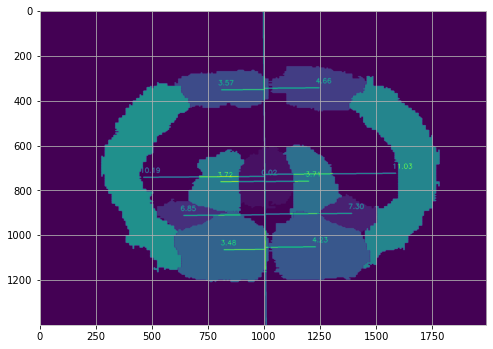

In [211]:
files_ = glob.glob("../data/images_with_predictions_v03/*dict")
file_ = np.random.choice(files_)
data_ = joblib.load(file_)
plt.imshow(data_['predicted_lever_arm_90'])

In [352]:
x = MuscleDetector(data_['id'], data_['id'], 10/529, data_['traced_image'])
x.predict(m11)
x.get_traced_contours(89.5)
x.get_predicted_contours(89.5)

In [353]:
x.predicted_features

{'lever_arm_89.5': [0.018789015882205065,
  7.303362118506754,
  6.848885309058641,
  4.660477664495686,
  3.5666357879035955,
  4.233887290178334,
  3.480413552167532,
  3.70621081313897,
  3.7175957279335856,
  11.034338921442748,
  10.189489101018033]}

In [354]:
x.get_contour_areas()

In [355]:
x.predicted_features

{'lever_arm_89.5': [0.018789015882205065,
  7.303362118506754,
  6.848885309058641,
  4.660477664495686,
  3.5666357879035955,
  4.233887290178334,
  3.480413552167532,
  3.70621081313897,
  3.7175957279335856,
  11.034338921442748,
  10.189489101018033],
 'area': [18.54981936170897,
  9.154305480612205,
  8.202514999589052,
  21.659978344845822,
  19.98098920458403,
  36.777134158325616,
  36.977783812950925,
  18.116716278172248,
  17.273380240922524,
  53.57274309339947,
  54.810231524329886]}

In [1]:
%reset -f
%load_ext autoreload
%autoreload 2
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8
from custom_imports import *
from mri_project.muscle_detector import MuscleDetector

In [2]:
m11 = tf.keras.models.load_model("../data/models/new_era.v03.11muscles.h5")
m9  = tf.keras.models.load_model("../data/models/new_era.v02.9muscles.h5")
data_files = glob.glob("../data/images_with_predictions_v03/*dict")
output_dir = "../data/images_with_predictions_v04/"

In [4]:
bar_lens = joblib.load("../data/file_bar_length.dict")
len(bar_lens)

832

In [8]:
all_images = glob.glob("../data/mri_analysis/**/*jpg", recursive=True)
non_raw_images = [x for x in all_images if '/raw/' not in x.lower()]
raw_images = [x for x in all_images if '/raw/' in x.lower()]
assert len(non_raw_images) == len(raw_images), (len(non_raw_images), len(raw_images))
raw_nonraw = dict(zip(sorted(raw_images), sorted(non_raw_images)))

In [9]:
if os.path.exists(output_dir):
    res = input(f"Directory {output_dir} already exists. Should I delete it?")
    if res.lower() == 'y':
        print(f"Deleting {output_dir}")
        shutil.rmtree(output_dir)
print(f"Creating {output_dir}")
os.mkdir(output_dir)

Directory ../data/images_with_predictions_v04/ already exists. Should I delete it?y
Deleting ../data/images_with_predictions_v04/
Creating ../data/images_with_predictions_v04/


In [10]:
from mri_project.utility import dfe
for data_file in data_files:
    data_ = joblib.load(data_file)
    scale = bar_lens.get(raw_nonraw[data_['id']].replace('../data/', ''))
    if scale is None:
        print("scale is None")
        scale = 10/529
    print(scale)
    md = MuscleDetector(data_['id'], data_['raw_image'], scale, data_['traced_image'])
    md.get_traced_contours(89.5)
    num_muscles = len(md.traced_contours)
    pred_ = data_['predicted_muscles']
    try:
        if isinstance(pred_, dict):
            pred_ = np.uint8(pred_[f"{num_muscles}_muscle"])
        md.predicted = pred_
        md.get_predicted_contours(89.5)
        md.get_contour_areas()
    except Exception as e:
        print("error:", str(e))
        md.exception = e
    output_file = output_dir + dfe(data_file)[1] + ".data"
    print(output_file)
    joblib.dump(md, output_file)

muscles not of size 9 or 11


520
../data/images_with_predictions_v04/2-WF4-6:50RepConRaw.data
369
../data/images_with_predictions_v04/4-COF2B-15:16PostRaw.data
369


muscles not of size 9 or 11


../data/images_with_predictions_v04/1-FCWM1-3:16PreRaw.data
525
../data/images_with_predictions_v04/1-WM6B-4:50ConRaw.data
368
../data/images_with_predictions_v04/2-WF2B-7:16PostRaw.data
181
../data/images_with_predictions_v04/2-COF3-7:16PreRaw.data
369
../data/images_with_predictions_v04/4-COF4B-14:16RepPostRaw.data
367
../data/images_with_predictions_v04/3-FCWM8-10:16PreRaw.data
519
../data/images_with_predictions_v04/1-WM3-3:50RepConRaw.data
370
../data/images_with_predictions_v04/4-WF6B-13:16RepPostRaw.data
369
../data/images_with_predictions_v04/1-COF4B-3:16PostRaw.data
181
../data/images_with_predictions_v04/2-CO2RR-7:16RawPre.data
523
../data/images_with_predictions_v04/1-WF2B-5:50ConRaw.data
369
../data/images_with_predictions_v04/2-WF3B-7:16RepPostRaw.data
369
../data/images_with_predictions_v04/2-FCWM1-7:16PreRaw.data
521
../data/images_with_predictions_v04/3-WF4B-15:50ConRaw.data
369
../data/images_with_predictions_v04/2-WM3B-6:16RepPostRaw.data
518
../data/images_with_predi

muscles not of size 9 or 11


519
../data/images_with_predictions_v04/4-WF1-21:50ConRaw.data
369
../data/images_with_predictions_v04/3-CO1-11:16RepPreRaw.data
519
../data/images_with_predictions_v04/4-COF3-22:50ConRaw.data
519
../data/images_with_predictions_v04/3-COF4-15:50ConRaw.data
518
../data/images_with_predictions_v04/2-WM6-5:50ConRaw.data
521
../data/images_with_predictions_v04/4-COM6B-20:50ConRaw.data
367
../data/images_with_predictions_v04/1-WF1B-3:16PostRaw.data
369
../data/images_with_predictions_v04/3-COM1B-11:16RepPostRaw.data
369
../data/images_with_predictions_v04/1-COM1B-2:16PostRaw.data
519
../data/images_with_predictions_v04/2-WM1B-9:50RepConRaw.data
181
../data/images_with_predictions_v04/3-CO3FCWM5-11:16PreRaw.data
518
../data/images_with_predictions_v04/3-WM3-16:50ConRaw.data
519
../data/images_with_predictions_v04/3-WF6-17:50RepConRaw.data
519
../data/images_with_predictions_v04/3-CO6-16:50RepConRaw.data
520
../data/images_with_predictions_v04/3-COF2-17:50RepConRaw.data
519
../data/images_wit

muscles not of size 9 or 11


369
../data/images_with_predictions_v04/3-CO5-11:16RepPreRaw.data
521
../data/images_with_predictions_v04/3-COM6B-15:50ConRaw.data
520
../data/images_with_predictions_v04/2-WM4B-10:50RepConRaw.data


muscles not of size 9 or 11


519
error: '10_muscle'
../data/images_with_predictions_v04/4-WM6-17:50RepConRaw.data
519
../data/images_with_predictions_v04/3-WM2-14:50RepConRaw.data
517
../data/images_with_predictions_v04/2-CO6-10:50ConRaw.data
368
../data/images_with_predictions_v04/2-COM5B-7:16RepPostRaw.data
519
../data/images_with_predictions_v04/3-WM6-11:50RepConRaw.data
369
../data/images_with_predictions_v04/3-FCWF3-10:16PreRaw.data
369
../data/images_with_predictions_v04/1-WM3B-3:16RepPostRaw.data


muscles not of size 9 or 11


521
../data/images_with_predictions_v04/2-WF4B-9:50PostRaw.data
521
../data/images_with_predictions_v04/3-COF5B-17:50ConRaw.data
517
../data/images_with_predictions_v04/1-CO3-3:50ConRaw.data
369
../data/images_with_predictions_v04/1-COF3-3:16RepPreRaw.data
519
../data/images_with_predictions_v04/2-WM3-9:50RepConRaw.data
391
../data/images_with_predictions_v04/2-FCWM2-6:16RepPreRaw.data
519
../data/images_with_predictions_v04/2-CO1-10:50RepConRaw.data
519
../data/images_with_predictions_v04/3-WM1-16:50RepConRaw.data
369
../data/images_with_predictions_v04/2-WM9B-8:16RepPostRaw.data
367
../data/images_with_predictions_v04/2-FCWM8-7:16PreRaw.data
521
../data/images_with_predictions_v04/1-WM6B-4:50RepConRaw.data
181
../data/images_with_predictions_v04/2-COF7-7:16PreRaw.data
367
../data/images_with_predictions_v04/4-WM3B-14:16PostRaw.data
369
../data/images_with_predictions_v04/1-WF6-3:16RepPreRaw.data
365
../data/images_with_predictions_v04/3-WM6B-11:16PostRaw.data
521
../data/images_with_

muscles not of size 9 or 11


370
../data/images_with_predictions_v04/4-REWF4-15:16PreRaw.data
520
../data/images_with_predictions_v04/4-WM3-22:50RepConRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/4-FCWM9-14:16RepPreRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/3-REWF4-11:16PreRaw.data
391
../data/images_with_predictions_v04/1-FCWM2-3:16RepPreRaw.data
369
../data/images_with_predictions_v04/2-WF5B-7:16RepPostRaw.data
518
../data/images_with_predictions_v04/1-WM9-1:50ConRaw.data
367
../data/images_with_predictions_v04/2-WF1B-7:16PostRaw.data
181
../data/images_with_predictions_v04/4-CO2RR-15:16RawPre.data
519
../data/images_with_predictions_v04/1-COF7-6:50ConRaw.data
365
../data/images_with_predictions_v04/3-WF5-11:16RepPreRaw.data
521
../data/images_with_predictions_v04/4-COF3B-21:50ConRaw.data
369
../data/images_with_predictions_v04/4-FCWF2-14:16PreRaw.data
369
../data/images_with_predictions_v04/3-COM3B-10:16PostRaw.data
521
../data/images_with_predictions_v04/3-COF4B-15:50RepConRaw.data


muscles not of size 9 or 11


365
../data/images_with_predictions_v04/1-FCWF1-2:16RepPreRaw.data


muscles not of size 9 or 11


367
../data/images_with_predictions_v04/3-WM4B-10:16PostRaw.data
181
../data/images_with_predictions_v04/4-CO5-15:16PreRaw.data
521
../data/images_with_predictions_v04/2-COF3B-10:50ConRaw.data
369
../data/images_with_predictions_v04/1-WM4B-3:16RepPostRaw.data
367
../data/images_with_predictions_v04/4-WM4B-14:16PostRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/4-FCCO6-15:16RepPreRaw.data


muscles not of size 9 or 11


521
../data/images_with_predictions_v04/4-WF4B-21:50RepConRaw.data
369
../data/images_with_predictions_v04/3-COF1-12:16RepPreRaw.data
367
../data/images_with_predictions_v04/4-FCWM8-14:16PreRaw.data
517
../data/images_with_predictions_v04/3-CO5-15:50ConRaw.data
370
../data/images_with_predictions_v04/3-COF2B-11:16RepPostRaw.data
521
../data/images_with_predictions_v04/4-WM6B-20:50RepConRaw.data
369
../data/images_with_predictions_v04/2-COF6B-7:16RepPostRaw.data
369
../data/images_with_predictions_v04/2-COF4-7:16RepPreRaw.data
181
../data/images_with_predictions_v04/4-COF1-15:16PreRaw.data
369
../data/images_with_predictions_v04/4-COF1-15:16RepPreRaw.data
369
../data/images_with_predictions_v04/2-COM1B-7:16RepPostRaw.data
390
../data/images_with_predictions_v04/4-FCWM2-14:16PreRaw.data
519
../data/images_with_predictions_v04/1-WF4-1:50RepConRaw.data
390
../data/images_with_predictions_v04/1-FCWM2-3:16PreRaw.data
521
../data/images_with_predictions_v04/4-COF2B-21:50RepConRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/3-FCWF3-10:16RepPreRaw.data
521
../data/images_with_predictions_v04/1-COM6B-4:50RepConRaw.data
369
../data/images_with_predictions_v04/4-WF5-15:16PreRaw.data
525
../data/images_with_predictions_v04/4-WM4B-22:50ConRaw.data
369
../data/images_with_predictions_v04/1-COF1-3:16REpPreRaw.data


muscles not of size 9 or 11


518
../data/images_with_predictions_v04/4-WM4-21:50ConRaw.data
519
../data/images_with_predictions_v04/1-COF1-4:50ConRaw.data


muscles not of size 9 or 11


521
../data/images_with_predictions_v04/1-COF4B-4:50ConRaw.data
369
../data/images_with_predictions_v04/3-WF3B-10:16RepPostRaw.data
181
../data/images_with_predictions_v04/1-CO1-3:16RawPre.data
517
../data/images_with_predictions_v04/3-CO6-16:50ConRaw.data
520
../data/images_with_predictions_v04/4-COF5B-22:50RepConRaw.data
520
../data/images_with_predictions_v04/3-CO4-12:50RepConRaw.data
525
../data/images_with_predictions_v04/3-WM4B-16:50ConRaw.data
369
../data/images_with_predictions_v04/2-COF4B-7:16PostRaw.data
525
../data/images_with_predictions_v04/1-WF5B-3:16PostRaw.data
369
../data/images_with_predictions_v04/1-FCWM8-3:16RepPreRaw.data
181
../data/images_with_predictions_v04/4-COF7-15:16PreRaw.data
520
../data/images_with_predictions_v04/1-WM6-1:50RepConRaw.data
369
../data/images_with_predictions_v04/3-WM8B-10:16RepPostRaw.data
369
../data/images_with_predictions_v04/3-COF4B-10:16PostRaw.data
181
../data/images_with_predictions_v04/3-COF6-11:16PreRaw.data
523
../data/images_wit

muscles not of size 9 or 11


367
../data/images_with_predictions_v04/2-FCWM4-7:16PreRaw.data
369
../data/images_with_predictions_v04/2-WF5-7:16PreRaw.data
521
../data/images_with_predictions_v04/4-COF6B-21:50RepConRaw.data
369
../data/images_with_predictions_v04/3-FCWM1-11:16PreRaw.data
369
../data/images_with_predictions_v04/2-WF2B-7:16RepPostRaw.data
516
../data/images_with_predictions_v04/4-WM8-18:50ConRaw.data
519
../data/images_with_predictions_v04/4-WF3-22:50ConRaw.data
369
../data/images_with_predictions_v04/4-COF3-15:16RepPreRaw.data
369
../data/images_with_predictions_v04/3-WF5-11:16PreRaw.data
518
../data/images_with_predictions_v04/3-WM4-15:50ConRaw.data
519
../data/images_with_predictions_v04/2-WF1-10:50ConRaw.data
369
../data/images_with_predictions_v04/1-COF3B-2:16RepPostRaw.data


muscles not of size 9 or 11


181
../data/images_with_predictions_v04/3-CO4-11:16PreRaw.data
517
../data/images_with_predictions_v04/3-WM3B-15:50ConRaw.data
518
../data/images_with_predictions_v04/1-WM3-3:50ConRaw.data
369
../data/images_with_predictions_v04/1-WF2B-3:16RepPostRaw.data
521
../data/images_with_predictions_v04/3-WF5B-16:50ConRaw.data
390
../data/images_with_predictions_v04/2-FCWM2-6:16PreRaw.data
367
../data/images_with_predictions_v04/3-COM5B-11:16PostRaw.data
367
../data/images_with_predictions_v04/2-COF2-6:16RepPreRaw.data
369
../data/images_with_predictions_v04/4-COF6B-15:16RepPostRaw.data
369
../data/images_with_predictions_v04/4-FCWM3-14:16PreRaw.data
365
../data/images_with_predictions_v04/4-WF5-15:16RepPreRaw.data
520
../data/images_with_predictions_v04/2-CO4-6:50RepConRaw.data
369
../data/images_with_predictions_v04/3-WF6-11:16RepPreRaw.data


muscles not of size 9 or 11


525
../data/images_with_predictions_v04/4-WM2B-21:50ConRaw.data
519
../data/images_with_predictions_v04/1-WF4-1:50ConRaw.data
369
../data/images_with_predictions_v04/3-COM2B-11:16PostRaw.data
181
../data/images_with_predictions_v04/3-CO1-11:16RawPre.data
369
../data/images_with_predictions_v04/2-COM2B-7:16RepPostRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/2-FCWF2-7:16PreRaw.data
369
../data/images_with_predictions_v04/4-WM1B-14:16PostRaw.data
369
../data/images_with_predictions_v04/3-COM4B-11:16PostRaw.data
181
../data/images_with_predictions_v04/2-FCCO6-7:16PreRaw.data
369
../data/images_with_predictions_v04/1-COM1B-2:16RepPostRaw.data


muscles not of size 9 or 11


370
../data/images_with_predictions_v04/2-COF1B-7:16RepPostRaw.data
520
../data/images_with_predictions_v04/4-WM9B-22:50RepConRaw.data
519
../data/images_with_predictions_v04/1-COF1-4:50RepConRaw.data
519
../data/images_with_predictions_v04/1-COF4-5:50RepConRaw.data


muscles not of size 9 or 11


181
../data/images_with_predictions_v04/1-COF5-3:16PreRaw.data
519
../data/images_with_predictions_v04/4-COF7-22:50ConRaw.data
599
../data/images_with_predictions_v04/3-FCWF1-10:16PreRaw.data
391
../data/images_with_predictions_v04/3-FCWM2-11:16RepPreRaw.data
519
../data/images_with_predictions_v04/4-COF5-21:50ConRaw.data
520
../data/images_with_predictions_v04/1-WM3B-3:50RepConRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/4-CO4-15:16RepPreRaw.data
523
../data/images_with_predictions_v04/3-COF1B-13:50ConRaw.data


muscles not of size 9 or 11


365
../data/images_with_predictions_v04/4-COM4B-15:16RepPostRaw.data
520
../data/images_with_predictions_v04/2-COF5B-11:50RepConRaw.data
369
../data/images_with_predictions_v04/3-COF3B-10:16RepPostRaw.data
369
../data/images_with_predictions_v04/3-COF5-10:16RepPreRaw.data
520
../data/images_with_predictions_v04/3-WF5B-15:50RepConRaw.data
369
../data/images_with_predictions_v04/1-COM6B-3:16RepPostRaw.data


muscles not of size 9 or 11


519
../data/images_with_predictions_v04/4-WF6-18:50ConRaw.data
521
../data/images_with_predictions_v04/4-COM3B-21:50ConRaw.data
519
../data/images_with_predictions_v04/2-WF6-5:50ConRaw.data
181
../data/images_with_predictions_v04/4-COF4-15:16PreRaw.data
367
../data/images_with_predictions_v04/4-FCWM9-14:16PreRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/1-COM6B-3:16PostRaw.data
369
../data/images_with_predictions_v04/3-COM1B-11:16PostRaw.data
518
../data/images_with_predictions_v04/2-WM3-9:50ConRaw.data
523
../data/images_with_predictions_v04/3-WM8B-16:50ConRaw.data
369
../data/images_with_predictions_v04/2-FCWM3-6:16RepPreRaw.data
369
../data/images_with_predictions_v04/1-COF5-3:16RepPreRaw.data
523
../data/images_with_predictions_v04/3-WF2B-16:50ConRaw.data
367
../data/images_with_predictions_v04/1-COF7-2:16RepPreRaw.data
369
../data/images_with_predictions_v04/4-COF7B-16:16RepPostRaw.data
519
../data/images_with_predictions_v04/1-WM2-3:50RepConRaw.data
519
../data/images_with_predictions_v04/3-COF2-17:50ConRaw.data
519
../data/images_with_predictions_v04/3-WF1-16:50ConRaw.data
525
../data/images_with_predictions_v04/3-WM2B-15:50ConRaw.data
369
../data/images_with_predictions_v04/1-WF6-3:16PreRaw.data
519
../data/images_with_predictions_v04/1-COF3-5:50ConRaw.data
525
../data/images_with_predic

muscles not of size 9 or 11


367
../data/images_with_predictions_v04/4-FCWM4-15:16PreRaw.data
521
../data/images_with_predictions_v04/3-WM6B-14:50RepConRaw.data
519
../data/images_with_predictions_v04/2-WF4-6:50ConRaw.data
181
../data/images_with_predictions_v04/1-COF6-3:16PreRaw.data


muscles not of size 9 or 11


181
../data/images_with_predictions_v04/4-CO4-15:16PreRaw.data
521
../data/images_with_predictions_v04/2-COF1B-8:50RepConRaw.data
519
../data/images_with_predictions_v04/2-COM5B-9:50RepConRaw.data


muscles not of size 9 or 11


367
../data/images_with_predictions_v04/1-WM4B-3:16PostRaw.data
369
../data/images_with_predictions_v04/3-WF6-11:16PreRaw.data
369
../data/images_with_predictions_v04/1-WM1B-3:16PostRaw.data
367
../data/images_with_predictions_v04/4-WF1B-14:16PostRaw.data
519
../data/images_with_predictions_v04/3-COF3-17:50ConRaw.data
367
../data/images_with_predictions_v04/4-FCWM4-15:16RepPreRaw.data
519
../data/images_with_predictions_v04/2-COM4B-10:50RepConRaw.data
369
../data/images_with_predictions_v04/2-COM6B-6:16RepPostRaw.data
519
../data/images_with_predictions_v04/1-COF6-5:50RepConRaw.data
519
../data/images_with_predictions_v04/1-WM4-2:50RepConRaw.data
367
../data/images_with_predictions_v04/4-CO2RR-14:16RepPreRaw.data
519
../data/images_with_predictions_v04/1-CO2RR-5:50RepConRaw.data


muscles not of size 9 or 11


519
../data/images_with_predictions_v04/4-WM4-21:50RepConRaw.data
519
../data/images_with_predictions_v04/1-WF2-5:50ConRaw.data
369
../data/images_with_predictions_v04/4-COF5B-15:16RepPostRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/4-CO5-15:16RepPreRaw.data
367
../data/images_with_predictions_v04/3-COF5B-11:16PostRaw.data
519
../data/images_with_predictions_v04/2-COF5-11:50ConRaw.data
521
../data/images_with_predictions_v04/4-COF3B-21:50RepConRaw.data
369
../data/images_with_predictions_v04/1-COF4B-3:16RepPostRaw.data
521
../data/images_with_predictions_v04/2-COM3B-9:50RepConRaw.data
520
../data/images_with_predictions_v04/1-WF5B-4:50RepConRaw.data
516
../data/images_with_predictions_v04/3-WM8-12:50ConRaw.data
369
../data/images_with_predictions_v04/3-WF5B-11:16RepPostRaw.data
518
../data/images_with_predictions_v04/2-WM2-9:50ConRaw.data
367
../data/images_with_predictions_v04/3-FCWM4-11:16RepPreRaw.data
368
../data/images_with_predictions_v04/2-WM2B-7:16RepPostRaw.data


muscles not of size 9 or 11


367
../data/images_with_predictions_v04/4-COF5B-15:16PostRaw.data
519
../data/images_with_predictions_v04/1-COM4B-5:50RepConRaw.data
369
../data/images_with_predictions_v04/3-COF6B-10:16RepPostRaw.data


muscles not of size 9 or 11


367
../data/images_with_predictions_v04/4-COF7B-16:16PostRaw.data


muscles not of size 9 or 11


521
../data/images_with_predictions_v04/4-WF4B-21:50ConRaw.data
521
../data/images_with_predictions_v04/1-COF4B-4:50RepConRaw.data
367
../data/images_with_predictions_v04/3-COF7B-10:16PostRaw.data
519
../data/images_with_predictions_v04/4-WM9-17:50ConRaw.data
523
../data/images_with_predictions_v04/4-COF1B-19:50ConRaw.data
519
../data/images_with_predictions_v04/1-CO1-4:50RepConRaw.data
369
../data/images_with_predictions_v04/3-FCWM8-10:16RepPreRaw.data
518
../data/images_with_predictions_v04/2-COF1-10:50ConRaw.data
519
../data/images_with_predictions_v04/3-WF2-16:50RepConRaw.data
519
../data/images_with_predictions_v04/2-WM1-10:50RepConRaw.data
369
../data/images_with_predictions_v04/4-COM2B-15:16PostRaw.data
519
../data/images_with_predictions_v04/1-COF5-5:50RepConRaw.data
365
../data/images_with_predictions_v04/2-COM4B-7:16RepPostRaw.data
521
../data/images_with_predictions_v04/2-COM3B-9:50ConRaw.data
521
../data/images_with_predictions_v04/1-COF2B-5:50RepConRaw.data
181
../data/ima

muscles not of size 9 or 11
muscles not of size 9 or 11


518
../data/images_with_predictions_v04/4-WF4B-21:50PostRaw.data
525
../data/images_with_predictions_v04/2-COF7B-10:50RepConRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/3-WF1B-11:16RepPostRaw.data
367
../data/images_with_predictions_v04/2-WF6B-6:16PostRaw.data
519
../data/images_with_predictions_v04/2-WF1-10:50RepConRaw.data
369
../data/images_with_predictions_v04/2-WF6-7:16PreRaw.data
525
../data/images_with_predictions_v04/2-WM6B-8:50ConRaw.data


muscles not of size 9 or 11


370
../data/images_with_predictions_v04/4-COM1B-15:16PostRaw.data
519
../data/images_with_predictions_v04/1-WM9-1:50RepConRaw.data
520
../data/images_with_predictions_v04/2-WM2B-10:50RepConRaw.data
519
../data/images_with_predictions_v04/3-WF1-16:50RepConRaw.data
519
../data/images_with_predictions_v04/2-COF3-11:50RepConRaw.data
518
../data/images_with_predictions_v04/4-WM2-20:50ConRaw.data
519
../data/images_with_predictions_v04/2-WM9-4:50RepConRaw.data
367
../data/images_with_predictions_v04/4-COF2-15:16RepPreRaw.data
520
../data/images_with_predictions_v04/2-WM2-9:50RepConRaw.data
181
../data/images_with_predictions_v04/4-COF6-15:16PreRaw.data
369
../data/images_with_predictions_v04/2-COF5B-7:16RepPostRaw.data
365
../data/images_with_predictions_v04/4-WM6B-14:16PostRaw.data


muscles not of size 9 or 11


519
../data/images_with_predictions_v04/4-WM1-21:50ConRaw.data


muscles not of size 9 or 11


521
../data/images_with_predictions_v04/3-COM2B-17:50ConRaw.data
369
../data/images_with_predictions_v04/3-COF1B-11:16PostRaw.data
368
../data/images_with_predictions_v04/2-FCWM3-6:16PreRaw.data
367
../data/images_with_predictions_v04/1-FCWM9-3:16PreRaw.data
367
../data/images_with_predictions_v04/2-WM2B-6:16PostRaw.data
521
../data/images_with_predictions_v04/2-COM6B-9:50ConRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/1-COM3B-3:16RepPostRaw.data
525
../data/images_with_predictions_v04/2-WF5B-7:16PostRaw.data
526
../data/images_with_predictions_v04/3-WF5B-11:16PostRaw.data
519
../data/images_with_predictions_v04/2-COF7-12:50ConRaw.data


muscles not of size 9 or 11


521
../data/images_with_predictions_v04/1-WF4B-3:50PostRaw.data
519
../data/images_with_predictions_v04/1-COM5B-3:50RepConRaw.data
519
../data/images_with_predictions_v04/4-COM5B-20:50RepConRaw.data
367
../data/images_with_predictions_v04/1-WF6B-2:16PostRaw.data
368
../data/images_with_predictions_v04/3-WM2B-11:16RepPostRaw.data
367
../data/images_with_predictions_v04/3-WF6B-10:16PostRaw.data
521
../data/images_with_predictions_v04/1-COM3B-2:50ConRaw.data


muscles not of size 9 or 11


181
../data/images_with_predictions_v04/2-CO4-7:16PreRaw.data
525
../data/images_with_predictions_v04/1-COF7B-5:50RepConRaw.data
518
../data/images_with_predictions_v04/2-WM8B-9:50RepConRaw.data
369
../data/images_with_predictions_v04/4-WF5B-15:16RepPostRaw.data
181
../data/images_with_predictions_v04/4-COF5-14:16PreRaw.data
521
../data/images_with_predictions_v04/3-COF3B-15:50RepConRaw.data
521
../data/images_with_predictions_v04/3-COF7B-16:50ConRaw.data
365
../data/images_with_predictions_v04/2-FCWM6-7:16RepPreRaw.data
369
../data/images_with_predictions_v04/1-FCWF3-2:16PreRaw.data
181
../data/images_with_predictions_v04/2-COF4-7:16PreRaw.data
369
../data/images_with_predictions_v04/3-WM3B-11:16RepPostRaw.data
521
../data/images_with_predictions_v04/1-COF3B-4:50RepConRaw.data
369
../data/images_with_predictions_v04/2-CO4-7:16RepPreRaw.data
519
../data/images_with_predictions_v04/2-WF6B-10:50RepConRaw.data


muscles not of size 9 or 11
muscles not of size 9 or 11


519
../data/images_with_predictions_v04/4-WF4-18:50ConRaw.data
369
../data/images_with_predictions_v04/2-COF2B-7:16RepPostRaw.data
370
../data/images_with_predictions_v04/4-WM1B-14:16RepPostRaw.data
369
../data/images_with_predictions_v04/3-FCWM3-11:16RepPreRaw.data
519
../data/images_with_predictions_v04/2-CO2RR-10:50ConRaw.data
369
../data/images_with_predictions_v04/4-COM3B-14:16PostRaw.data
519
../data/images_with_predictions_v04/4-COF1-21:50ConRaw.data
519
../data/images_with_predictions_v04/4-WM2-20:50RepConRaw.data
519
../data/images_with_predictions_v04/2-COF6-10:50ConRaw.data
369
../data/images_with_predictions_v04/3-WM4B-10:16RepPostRaw.data
519
../data/images_with_predictions_v04/4-CO6-21:50RepConRaw.data
369
../data/images_with_predictions_v04/1-FCWM1-3:16RepPreRaw.data
525
../data/images_with_predictions_v04/1-WM2B-4:50ConRaw.data
515
../data/images_with_predictions_v04/3-WM8-12:50RepConRaw.data
519
../data/images_with_predictions_v04/1-COF3-5:50RepConRaw.data
519
../data/

muscles not of size 9 or 11


369
../data/images_with_predictions_v04/1-REWF4-2:16PreRaw.data
521
../data/images_with_predictions_v04/2-COF3B-10:50RepConRaw.data
520
../data/images_with_predictions_v04/4-WM3B-22:50RepConRaw.data
181
../data/images_with_predictions_v04/2-CO3FCWM5-8:16PreRaw.data
519
../data/images_with_predictions_v04/2-WF2-10:50RepConRaw.data
370
../data/images_with_predictions_v04/4-WM6B-14:16RepPostRaw.data
517
../data/images_with_predictions_v04/1-CO6-4:50ConRaw.data
369
../data/images_with_predictions_v04/1-COF4-3:16RepPreRaw.data
519
../data/images_with_predictions_v04/4-WF5-22:50RepConRaw.data
367
../data/images_with_predictions_v04/4-WF6B-13:16PostRaw.data
369
../data/images_with_predictions_v04/4-COF4B-15:16PostRaw.data
367
../data/images_with_predictions_v04/1-WM8B-3:16PostRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/2-REWF4-6:16PreRaw.data
370
../data/images_with_predictions_v04/2-WM6B-7:16RepPostRaw.data
521
../data/images_with_predictions_v04/4-WF3B-22:50RepConRaw.data
521
../data/images_with_predictions_v04/1-COM1B-2:50ConRaw.data


muscles not of size 9 or 11


520
../data/images_with_predictions_v04/4-CO5-21:50RepConRaw.data
368
../data/images_with_predictions_v04/4-WM2B-14:16RepPostRaw.data
369
../data/images_with_predictions_v04/4-COM4B-15:16PostRaw.data
369
../data/images_with_predictions_v04/2-COF3-7:16RepPreRaw.data
369
../data/images_with_predictions_v04/2-FCWF3-6:16PreRaw.data
369
../data/images_with_predictions_v04/1-WM9B-3:16PostRaw.data
520
../data/images_with_predictions_v04/1-WM4B-3:50RepConRaw.data
524
../data/images_with_predictions_v04/1-WF3-4:50ConRaw.data
525
../data/images_with_predictions_v04/2-WM2B-9:50ConRaw.data
521
../data/images_with_predictions_v04/3-COM6B-15:50RepConRaw.data
521
../data/images_with_predictions_v04/1-COM2B-5:50RepConRaw.data


muscles not of size 9 or 11


519
../data/images_with_predictions_v04/4-CO1-22:50RepConRaw.data
367
../data/images_with_predictions_v04/1-COF2-3:16RepPreRaw.data
525
../data/images_with_predictions_v04/1-WM3B-3:50ConRaw.data
519
../data/images_with_predictions_v04/4-WM9-16:50RepConRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/4-WF6-15:16PreRaw.data
369
../data/images_with_predictions_v04/3-COF4-10:16RepPreRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/1-COF2B-4:16RepPostRaw.data
519
../data/images_with_predictions_v04/1-WF2-4:50RepConRaw.data
521
../data/images_with_predictions_v04/4-COF1B-19:50RepConRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/3-FCWF2-11:16PreRaw.data
365
../data/images_with_predictions_v04/4-FCWM6-14:16RepPreRaw.data
519
../data/images_with_predictions_v04/2-WM4-9:50RepConRaw.data
181
../data/images_with_predictions_v04/3-CO2RR-11:16RawPre.data
369
../data/images_with_predictions_v04/1-FCWM3-3:16RepPreRaw.data
520
../data/images_with_predictions_v04/2-CO2RR-10:50RepConRaw.data
521
../data/images_with_predictions_v04/2-WM6B-8:50RepConRaw.data
520
../data/images_with_predictions_v04/2-WM9B-10:50RepConRaw.data
369
../data/images_with_predictions_v04/2-WM1B-7:16PostRaw.data
525
../data/images_with_predictions_v04/3-COF7B-16:50RepConRaw.data
519
../data/images_with_predictions_v04/2-COF5-11:50RepConRaw.data
520
../data/images_with_predictions_v04/2-WF1B-10:50RepConRaw.data
599
../data/images_with_predictions_v04/4-FCWF1-14:16PreRaw.data
521
../data/images_with_predictions_v04/3-COM1B-14:50RepConRaw.data
519
../data/images_with_predictions_v04/2-COF6-10:50RepConRaw.data
518

muscles not of size 9 or 11


525
error: '10_muscle'
../data/images_with_predictions_v04/4-WM1B-21:50ConRaw.data


muscles not of size 9 or 11


367
../data/images_with_predictions_v04/2-COF7B-7:16PostRaw.data
520
../data/images_with_predictions_v04/1-COF5B-6:50RepConRaw.data
517
../data/images_with_predictions_v04/4-CO4-18:50ConRaw.data
365
../data/images_with_predictions_v04/2-WM6B-7:16PostRaw.data
181
../data/images_with_predictions_v04/3-FCCO6-11:16PreRaw.data
521
../data/images_with_predictions_v04/2-COM2B-11:50ConRaw.data
369
../data/images_with_predictions_v04/4-FCWM1-14:16RepPreRaw.data
519
../data/images_with_predictions_v04/2-CO1-10:50ConRaw.data
521
../data/images_with_predictions_v04/1-WF6B-4:50ConRaw.data
521
../data/images_with_predictions_v04/1-COM5B-3:50ConRaw.data
526
../data/images_with_predictions_v04/4-WF5B-15:16PostRaw.data
369
../data/images_with_predictions_v04/3-FCWM3-11:16PreRaw.data
517
../data/images_with_predictions_v04/1-CO5-4:50ConRaw.data
367
../data/images_with_predictions_v04/1-WF3B-2:16PostRaw.data
367
../data/images_with_predictions_v04/1-WM3B-3:16PostRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/3-COF2B-11:16PostRaw.data
525
../data/images_with_predictions_v04/4-WM9B-22:50ConRaw.data
521
../data/images_with_predictions_v04/3-WF4B-15:50RepConRaw.data


muscles not of size 9 or 11


521
../data/images_with_predictions_v04/4-COF4B-20:50ConRaw.data
519
../data/images_with_predictions_v04/3-COF4-15:50RepConRaw.data
367
../data/images_with_predictions_v04/3-WM8B-10:16PostRaw.data
525
../data/images_with_predictions_v04/1-WM1B-3:50ConRaw.data
519
../data/images_with_predictions_v04/1-WF6B-4:50RepConRaw.data
521
../data/images_with_predictions_v04/2-COF4B-9:50RepConRaw.data


muscles not of size 9 or 11


181
../data/images_with_predictions_v04/2-COF6-6:16PreRaw.data
515
../data/images_with_predictions_v04/2-WM8-5:50RepConRaw.data
369
../data/images_with_predictions_v04/1-COM2B-3:16PostRaw.data
368
../data/images_with_predictions_v04/1-WF2B-3:16PostRaw.data
521
../data/images_with_predictions_v04/3-WF3B-16:50ConRaw.data
519
../data/images_with_predictions_v04/3-COF6-16:50RepConRaw.data
369
../data/images_with_predictions_v04/4-WM9B-15:16PostRaw.data
519
../data/images_with_predictions_v04/4-WF2-21:50ConRaw.data
369
../data/images_with_predictions_v04/1-CO5-3:16RepPreRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/1-COM2B-3:16RepPostRaw.data
518
../data/images_with_predictions_v04/3-WM9-10:50ConRaw.data
519
../data/images_with_predictions_v04/2-COF4-11:50ConRaw.data
522
../data/images_with_predictions_v04/3-WF3-16:50ConRaw.data
523
../data/images_with_predictions_v04/2-WM8B-9:50ConRaw.data
521
../data/images_with_predictions_v04/2-COM2B-11:50RepConRaw.data
519
../data/images_with_predictions_v04/1-COF6-4:50ConRaw.data
367
../data/images_with_predictions_v04/2-FCWM9-6:16PreRaw.data
181
../data/images_with_predictions_v04/4-COF3-15:16PreRaw.data
369
../data/images_with_predictions_v04/4-WF1B-14:16RepPostRaw.data
521
../data/images_with_predictions_v04/1-WF1B-4:50ConRaw.data
521
../data/images_with_predictions_v04/1-COF6B-4:50PreConRaw.data
519
../data/images_with_predictions_v04/3-WF2-16:50ConRaw.data
369
../data/images_with_predictions_v04/1-COM5B-3:16RepPostRaw.data


muscles not of size 9 or 11


519
../data/images_with_predictions_v04/4-COF2-22:50ConRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/2-COM6B-6:16PostRaw.data
368
../data/images_with_predictions_v04/3-WF2B-11:16PostRaw.data
367
../data/images_with_predictions_v04/4-COM5B-15:16RepPostRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/1-REWF4-2:16RepPreRaw.data
181
../data/images_with_predictions_v04/3-COF7-10:16PreRaw.data


muscles not of size 9 or 11


519
../data/images_with_predictions_v04/4-WF6B-20:50RepConRaw.data


muscles not of size 9 or 11


519
../data/images_with_predictions_v04/3-WF4-12:50ConRaw.data
519
../data/images_with_predictions_v04/1-WM1-4:50RepConRaw.data
519
../data/images_with_predictions_v04/4-COF6-21:50RepConRaw.data
369
../data/images_with_predictions_v04/3-WF2B-11:16RepPostRaw.data
369
../data/images_with_predictions_v04/4-COF3B-14:16RepPostRaw.data
521
../data/images_with_predictions_v04/2-WF4B-9:50ConRaw.data
521
../data/images_with_predictions_v04/2-COF5B-11:50ConRaw.data
181
../data/images_with_predictions_v04/1-COF2-3:16PreRaw.data


muscles not of size 9 or 11


519
../data/images_with_predictions_v04/4-WF4-18:50RepConRaw.data
369
../data/images_with_predictions_v04/2-FCCO6-7:16RepPreRaw.data
521
../data/images_with_predictions_v04/4-COF7B-21:50ConRaw.data
521
../data/images_with_predictions_v04/1-COM2B-5:50ConRaw.data
521
../data/images_with_predictions_v04/3-COF1B-14:50RepConRaw.data


muscles not of size 9 or 11


365
../data/images_with_predictions_v04/4-FCWF1-14:16RepPreRaw.data
521
../data/images_with_predictions_v04/2-COM4B-10:50ConRaw.data
518
../data/images_with_predictions_v04/4-WM6-17:50ConRaw.data
370
../data/images_with_predictions_v04/4-WM9B-15:16RepPostRaw.data
369
../data/images_with_predictions_v04/4-WM8B-14:16RepPostRaw.data
519
../data/images_with_predictions_v04/3-CO2RR-16:50RepConRaw.data
369
../data/images_with_predictions_v04/1-COF1B-2:16PostRaw.data
369
../data/images_with_predictions_v04/4-COM1B-15:16RepPostRaw.data
369
../data/images_with_predictions_v04/4-COM6B-15:16PostRaw.data
521
../data/images_with_predictions_v04/1-WF5B-4:50ConRaw.data
520
../data/images_with_predictions_v04/4-WF3-22:50RepConRaw.data
521
../data/images_with_predictions_v04/2-COM5B-9:50ConRaw.data


muscles not of size 9 or 11


519
../data/images_with_predictions_v04/3-COF5-16:50RepConRaw.data
369
../data/images_with_predictions_v04/1-COF7B-3:16RepPostRaw.data
181
../data/images_with_predictions_v04/1-CO4-3:16PreRaw.data
521
../data/images_with_predictions_v04/1-COM4B-5:50ConRaw.data
369
../data/images_with_predictions_v04/4-WF3B-14:16RepPostRaw.data
369
../data/images_with_predictions_v04/2-COF6-6:16RepPreRaw.data
523
../data/images_with_predictions_v04/2-COF1B-8:50ConRaw.data
519
../data/images_with_predictions_v04/3-COM5B-15:50RepConRaw.data
521
../data/images_with_predictions_v04/4-WF3B-22:50ConRaw.data
367
../data/images_with_predictions_v04/3-COF7-11:16RepPreRaw.data
367
../data/images_with_predictions_v04/2-COF7-7:16RepPreRaw.data
369
../data/images_with_predictions_v04/2-WF1B-7:16RepPostRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/1-FCWM9-3:16RepPreRaw.data
517
../data/images_with_predictions_v04/4-CO3-20:50ConRaw.data
518
../data/images_with_predictions_v04/2-CO4-6:50ConRaw.data
521
../data/images_with_predictions_v04/2-WF4B-9:50RepPostRaw.data
519
../data/images_with_predictions_v04/2-WF3-10:50RepConRaw.data
181
../data/images_with_predictions_v04/1-COF7-2:16PreRaw.data
369
../data/images_with_predictions_v04/3-WF6B-10:16RepPostRaw.data
369
../data/images_with_predictions_v04/1-CO1-3:16RepPreRaw.data
520
../data/images_with_predictions_v04/4-COF3-22:50RepConRaw.data
521
../data/images_with_predictions_v04/3-COM3B-15:50RepConRaw.data
369
../data/images_with_predictions_v04/4-WM4B-14:16RepPostRaw.data
367
../data/images_with_predictions_v04/2-WF3B-7:16PostRaw.data
369
../data/images_with_predictions_v04/3-CO4-11:16RepPreRaw.data
369
../data/images_with_predictions_v04/1-WF3B-2:16RepPostRaw.data


muscles not of size 9 or 11


521
../data/images_with_predictions_v04/4-WF4B-21:50RepPostRaw.data
367
../data/images_with_predictions_v04/4-WM2B-14:16PostRaw.data
369
../data/images_with_predictions_v04/2-FCWM8-7:16RepPreRaw.data


muscles not of size 9 or 11


519
../data/images_with_predictions_v04/4-COF6-22:50ConRaw.data


muscles not of size 9 or 11


181
../data/images_with_predictions_v04/1-COF1-3:16PreRaw.data
519
../data/images_with_predictions_v04/3-CO3-14:50RepConRaw.data
523
../data/images_with_predictions_v04/1-COF1B-2:50ConRaw.data
520
../data/images_with_predictions_v04/1-WM2B-4:50RepConRaw.data
525
../data/images_with_predictions_v04/4-COF7B-21:50RepConRaw.data
519
../data/images_with_predictions_v04/4-WF1-21:50RepConRaw.data
370
../data/images_with_predictions_v04/1-WM9B-3:16RepPostRaw.data
521
../data/images_with_predictions_v04/2-COF6B-10:50RepConRaw.data
369
../data/images_with_predictions_v04/2-FCWM1-7:16RepPreRaw.data
367
../data/images_with_predictions_v04/4-WM8B-14:16PostRaw.data
369
../data/images_with_predictions_v04/2-COF1B-7:16PostRaw.data
519
../data/images_with_predictions_v04/4-COF4-21:50ConRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/1-FCCO6-1:16RepPreRaw.data
181
../data/images_with_predictions_v04/3-COF5-10:16PreRaw.data
369
../data/images_with_predictions_v04/2-COF1-7:16RepPreRaw.data
369
../data/images_with_predictions_v04/4-COM5B-15:16PostRaw.data


muscles not of size 9 or 11


521
../data/images_with_predictions_v04/3-COF4B-15:50ConRaw.data
367
../data/images_with_predictions_v04/2-FCWM4-7:16RepPreRaw.data
521
../data/images_with_predictions_v04/4-COM1B-21:50RepConRaw.data
521
../data/images_with_predictions_v04/4-COM4B-22:50ConRaw.data


muscles not of size 9 or 11


519
../data/images_with_predictions_v04/4-WF2-21:50RepConRaw.data
519
../data/images_with_predictions_v04/2-COF7-12:50RepConRaw.data
521
../data/images_with_predictions_v04/1-COM1B-2:50RepConRaw.data
521
../data/images_with_predictions_v04/3-COF6B-15:50ConRaw.data
519
../data/images_with_predictions_v04/4-COF7-22:50RepConRaw.data
369
../data/images_with_predictions_v04/4-WF2B-15:16RepPostRaw.data
521
../data/images_with_predictions_v04/1-COM3B-2:50RepConRaw.data
369
../data/images_with_predictions_v04/1-WF5B-3:16RepPostRaw.data


muscles not of size 9 or 11


519
../data/images_with_predictions_v04/4-CO1-22:50ConRaw.data
521
../data/images_with_predictions_v04/3-COF3B-15:50ConRaw.data
365
../data/images_with_predictions_v04/3-FCWM6-11:16RepPreRaw.data
367
../data/images_with_predictions_v04/1-COM5B-3:16PostRaw.data
519
../data/images_with_predictions_v04/2-CO6-10:50RepConRaw.data
365
../data/images_with_predictions_v04/1-COM4B-3:16RepPostRaw.data
367
../data/images_with_predictions_v04/4-CO3FCWM5-15:16RepPreRaw.data
519
../data/images_with_predictions_v04/1-CO6-4:50RepConRaw.data
359
../data/images_with_predictions_v04/2-FCWM6-7:16PreRaw.data
521
../data/images_with_predictions_v04/3-COM4B-16:50ConRaw.data


muscles not of size 9 or 11


519
../data/images_with_predictions_v04/4-WM1B-21:50RepConRaw.data
520
../data/images_with_predictions_v04/1-WF3-4:50RepConRaw.data
369
../data/images_with_predictions_v04/3-COF3-11:16RepPreRaw.data
517
../data/images_with_predictions_v04/2-CO3-8:50ConRaw.data
525
../data/images_with_predictions_v04/1-WM9B-6:50ConRaw.data
369
../data/images_with_predictions_v04/2-CO5-6:16RepPreRaw.data
181
../data/images_with_predictions_v04/4-CO1-15:16RawPre.data
519
../data/images_with_predictions_v04/1-WM1-4:50ConRaw.data
521
../data/images_with_predictions_v04/2-WF1B-10:50ConRaw.data


muscles not of size 9 or 11


181
../data/images_with_predictions_v04/2-COF2-7:16PreRaw.data
521
../data/images_with_predictions_v04/3-WF3B-16:50RepConRaw.data
521
../data/images_with_predictions_v04/1-COF1B-2:50RepConRaw.data
522
../data/images_with_predictions_v04/1-COF5-5:50ConRaw.data
369
../data/images_with_predictions_v04/1-COF6B-3:16RepPostRaw.data


muscles not of size 9 or 11


517
../data/images_with_predictions_v04/4-CO5-21:50ConRaw.data
521
../data/images_with_predictions_v04/4-WF6B-20:50ConRaw.data


muscles not of size 9 or 11


367
../data/images_with_predictions_v04/3-WM2B-11:16PostRaw.data
369
../data/images_with_predictions_v04/3-COM3B-10:16RepPostRaw.data
519
../data/images_with_predictions_v04/4-CO2RR-22:50ConRaw.data
521
../data/images_with_predictions_v04/2-COM6B-9:50RepConRaw.data
521
../data/images_with_predictions_v04/3-WF6B-16:50ConRaw.data
365
../data/images_with_predictions_v04/1-FCWM6-2:16RepPreRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/3-REWF4-11:16RepPreRaw.data
521
../data/images_with_predictions_v04/3-COF2B-16:50RepConRaw.data
369
../data/images_with_predictions_v04/2-COM3B-6:16PostRaw.data
181
../data/images_with_predictions_v04/3-COF3-11:16PreRaw.data
369
../data/images_with_predictions_v04/3-COF7B-10:16RepPostRaw.data
369
../data/images_with_predictions_v04/1-FCWF2-4:16RepPreRaw.data
181
../data/images_with_predictions_v04/1-COF3-3:16PreRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/1-WF1B-3:16RepPostRaw.data


muscles not of size 9 or 11


368
../data/images_with_predictions_v04/3-COM6B-11:16PostRaw.data
521
../data/images_with_predictions_v04/3-WF4B-15:50RepPostRaw.data
519
../data/images_with_predictions_v04/4-WF5-22:50ConRaw.data
521
../data/images_with_predictions_v04/1-COF5B-6:50ConRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/4-FCWF3-14:16RepPreRaw.data
519
../data/images_with_predictions_v04/4-COF4-21:50RepConRaw.data
369
../data/images_with_predictions_v04/3-COF6-11:16RepPreRaw.data
369
../data/images_with_predictions_v04/4-CO1-15:16RepPreRaw.data
369
../data/images_with_predictions_v04/2-COM4B-7:16PostRaw.data


muscles not of size 9 or 11


367
../data/images_with_predictions_v04/3-FCWM4-11:16PreRaw.data
519
../data/images_with_predictions_v04/4-WM1-21:50RepConRaw.data
517
../data/images_with_predictions_v04/2-WM3B-9:50ConRaw.data
521
../data/images_with_predictions_v04/2-COF2B-10:50ConRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/2-FCWF3-6:16RepPreRaw.data
369
../data/images_with_predictions_v04/2-COF3B-7:16PostRaw.data
181
../data/images_with_predictions_v04/4-COF2-15:16PreRaw.data
181
../data/images_with_predictions_v04/1-CO2RR-3:16RawPre.data
365
../data/images_with_predictions_v04/3-COM4B-11:16RepPostRaw.data
520
../data/images_with_predictions_v04/1-COF2-6:50RepConRaw.data
521
../data/images_with_predictions_v04/2-COF7B-11:50ConRaw.data
367
../data/images_with_predictions_v04/2-COF5B-7:16PostRaw.data
521
../data/images_with_predictions_v04/2-COF2B-10:50RepConRaw.data
367
../data/images_with_predictions_v04/2-WM3B-6:16PostRaw.data
367
../data/images_with_predictions_v04/1-CO3FCWM5-3:16RepPreRaw.data
367
../data/images_with_predictions_v04/3-WM3B-11:16PostRaw.data
367
../data/images_with_predictions_v04/2-CO2RR-7:16RepPreRaw.data
521
../data/images_with_predictions_v04/4-COM6B-20:50RepConRaw.data


muscles not of size 9 or 11


518
../data/images_with_predictions_v04/3-WM8B-16:50RepConRaw.data
521
../data/images_with_predictions_v04/4-COF4B-20:50RepConRaw.data
367
../data/images_with_predictions_v04/2-COM5B-7:16PostRaw.data
521
../data/images_with_predictions_v04/2-COF6B-10:50PreConRaw.data
519
../data/images_with_predictions_v04/3-COF7-17:50ConRaw.data
359
../data/images_with_predictions_v04/3-FCWM6-11:16PreRaw.data
367
../data/images_with_predictions_v04/3-WF3B-10:16PostRaw.data
521
../data/images_with_predictions_v04/2-WF5B-9:50ConRaw.data
369
../data/images_with_predictions_v04/1-COF3B-2:16PostRaw.data
519
../data/images_with_predictions_v04/3-WM1B-15:50RepConRaw.data
519
../data/images_with_predictions_v04/3-WF6-11:50ConRaw.data
369
../data/images_with_predictions_v04/4-WF6-15:16RepPreRaw.data
520
../data/images_with_predictions_v04/4-WF2B-22:50RepConRaw.data
520
../data/images_with_predictions_v04/2-WF5B-9:50RepConRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/4-COM2B-15:16RepPostRaw.data
525
../data/images_with_predictions_v04/3-WM9B-16:50ConRaw.data
370
../data/images_with_predictions_v04/3-WM1B-10:16RepPostRaw.data
369
../data/images_with_predictions_v04/3-COF5B-11:16RepPostRaw.data
517
../data/images_with_predictions_v04/1-WM4-2:50ConRaw.data
521
../data/images_with_predictions_v04/1-WF4B-3:50ConRaw.data
367
../data/images_with_predictions_v04/1-CO2RR-3:16RepPreRaw.data


muscles not of size 9 or 11


521
../data/images_with_predictions_v04/2-COF4B-10:50ConRaw.data
369
../data/images_with_predictions_v04/1-COM4B-3:16PostRaw.data
369
../data/images_with_predictions_v04/2-COF7B-7:16RepPostRaw.data
519
../data/images_with_predictions_v04/4-CO2RR-22:50RepConRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/1-FCWF3-2:16RepPreRaw.data
520
../data/images_with_predictions_v04/3-WF1B-15:50RepConRaw.data
369
../data/images_with_predictions_v04/4-COM6B-15:16RepPostRaw.data


muscles not of size 9 or 11


521
../data/images_with_predictions_v04/4-COM2B-22:50ConRaw.data
521
../data/images_with_predictions_v04/1-CO4-1:50ConRaw.data
365
../data/images_with_predictions_v04/2-WF5-7:16RepPreRaw.data
521
../data/images_with_predictions_v04/2-WF6B-10:50ConRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/2-WF6-7:16RepPreRaw.data
520
../data/images_with_predictions_v04/4-WF1B-21:50RepConRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/4-COM3B-14:16RepPostRaw.data
520
../data/images_with_predictions_v04/3-COF5B-17:50RepConRaw.data
369
../data/images_with_predictions_v04/1-COF6-3:16repPreRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/1-COF2B-4:16PostRaw.data
521
../data/images_with_predictions_v04/2-WF3B-10:50ConRaw.data
519
../data/images_with_predictions_v04/1-CO1-4:50ConRaw.data
521
../data/images_with_predictions_v04/1-WF4B-3:50RepConRaw.data
519
../data/images_with_predictions_v04/3-WM6-11:50ConRaw.data
520
../data/images_with_predictions_v04/4-WM2B-21:50RepConRaw.data
369
../data/images_with_predictions_v04/1-WM8B-3:16RepPostRaw.data
369
../data/images_with_predictions_v04/4-COF1B-15:16PostRaw.data
525
../data/images_with_predictions_v04/3-WM6B-14:50ConRaw.data
369
../data/images_with_predictions_v04/4-FCWM1-14:16PreRaw.data
369
../data/images_with_predictions_v04/1-FCWM3-3:16PreRaw.data
369
../data/images_with_predictions_v04/2-WM1B-7:16RepPostRaw.data
369
../data/images_with_predictions_v04/4-FCWM8-14:16RepPreRaw.data
523
../data/images_with_predictions_v04/4-WF2B-22:50ConRaw.data


muscles not of size 9 or 11


367
../data/images_with_predictions_v04/1-FCWM4-3:16PreRaw.data
521
../data/images_with_predictions_v04/2-WF4B-9:50RepConRaw.data
521
../data/images_with_predictions_v04/4-WF5B-22:50ConRaw.data
519
../data/images_with_predictions_v04/4-CO3-20:50RepConRaw.data
521
../data/images_with_predictions_v04/3-COM1B-14:50ConRaw.data
369
../data/images_with_predictions_v04/3-WM9B-11:16RepPostRaw.data
521
../data/images_with_predictions_v04/1-WF3B-4:50RepConRaw.data
599
../data/images_with_predictions_v04/1-FCWF1-2:16PreRaw.data
519
../data/images_with_predictions_v04/1-WF6-1:50ConRaw.data
369
../data/images_with_predictions_v04/2-WM9B-8:16PostRaw.data
518
../data/images_with_predictions_v04/1-WM8B-5:50RepConRaw.data
367
../data/images_with_predictions_v04/3-WF1B-11:16PostRaw.data
370
../data/images_with_predictions_v04/3-COF1B-11:16RepPostRaw.data
369
../data/images_with_predictions_v04/3-WM9B-11:16PostRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/4-REWF4-15:16RepPreRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/3-FCWF2-11:16RepPreRaw.data
369
../data/images_with_predictions_v04/1-WF6B-3:16RepPostRaw.data
369
../data/images_with_predictions_v04/4-FCWM3-14:16RepPreRaw.data
517
../data/images_with_predictions_v04/4-CO6-21:50ConRaw.data
369
../data/images_with_predictions_v04/2-COM3B-6:16RepPostRaw.data
525
../data/images_with_predictions_v04/3-WM1B-15:50ConRaw.data
520
../data/images_with_predictions_v04/3-WM2B-15:50RepConRaw.data


muscles not of size 9 or 11


181
../data/images_with_predictions_v04/2-COF5-7:16PreRaw.data
519
../data/images_with_predictions_v04/2-WF2-10:50ConRaw.data
367
../data/images_with_predictions_v04/1-FCWM6-2:16PreRaw.data
520
../data/images_with_predictions_v04/4-WF5B-22:50RepConRaw.data
369
../data/images_with_predictions_v04/4-COF6-15:16RepPreRaw.data
520
../data/images_with_predictions_v04/3-WM3B-15:50RepConRaw.data
367
../data/images_with_predictions_v04/1-WM2B-3:16PostRaw.data
520
../data/images_with_predictions_v04/3-WF3-16:50RepConRaw.data
525
../data/images_with_predictions_v04/2-WM9B-10:50ConRaw.data
369
../data/images_with_predictions_v04/2-FCWM9-6:16RepPreRaw.data
521
../data/images_with_predictions_v04/2-COM1B-9:50RepConRaw.data
181
../data/images_with_predictions_v04/3-COF1-12:16PreRaw.data
367
../data/images_with_predictions_v04/3-FCWM9-11:16PreRaw.data
520
../data/images_with_predictions_v04/2-WF2B-11:50RepConRaw.data
519
../data/images_with_predictions_v04/2-COF1-10:50RepConRaw.data
519
../data/images

muscles not of size 9 or 11


369
../data/images_with_predictions_v04/2-REWF4-6:16RepPreRaw.data
516
../data/images_with_predictions_v04/2-WM8-5:50ConRaw.data
521
../data/images_with_predictions_v04/4-COM1B-21:50ConRaw.data
519
../data/images_with_predictions_v04/3-WF5-16:50RepConRaw.data
365
../data/images_with_predictions_v04/1-WF5-2:16RepPreRaw.data
519
../data/images_with_predictions_v04/1-CO2RR-5:50ConRaw.data
367
../data/images_with_predictions_v04/1-FCWM4-3:16RepPreRaw.data
369
../data/images_with_predictions_v04/4-FCWF3-14:16PreRaw.data
367
../data/images_with_predictions_v04/4-WF2B-15:16PostRaw.data


muscles not of size 9 or 11


367
../data/images_with_predictions_v04/4-COF6B-15:16PostRaw.data


muscles not of size 9 or 11


523
../data/images_with_predictions_v04/4-WM8B-22:50ConRaw.data
518
../data/images_with_predictions_v04/4-WM3-22:50ConRaw.data
599
../data/images_with_predictions_v04/2-FCWF1-6:16PreRaw.data
519
../data/images_with_predictions_v04/3-WM9-10:50RepConRaw.data
517
../data/images_with_predictions_v04/3-CO3-14:50ConRaw.data
520
../data/images_with_predictions_v04/1-WF2B-5:50RepConRaw.data


muscles not of size 9 or 11


519
../data/images_with_predictions_v04/4-WF6-21:50RepConRaw.data
519
../data/images_with_predictions_v04/2-WF3-10:50ConRaw.data


muscles not of size 9 or 11


517
error: '10_muscle'
../data/images_with_predictions_v04/4-WM3B-22:50ConRaw.data
181
../data/images_with_predictions_v04/1-FCCO6-1:16PreRaw.data
516
../data/images_with_predictions_v04/1-WM8-1:50ConRaw.data
521
../data/images_with_predictions_v04/4-COF5B-22:50ConRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/2-FCWF2-7:16RepPreRaw.data
515
../data/images_with_predictions_v04/4-WM8-18:50RepConRaw.data
370
../data/images_with_predictions_v04/4-COF1B-15:16RepPostRaw.data
519
../data/images_with_predictions_v04/4-CO4-18:50RepConRaw.data


muscles not of size 9 or 11


367
../data/images_with_predictions_v04/1-COF6B-3:16PostRaw.data
181
../data/images_with_predictions_v04/1-CO3FCWM5-3:16PreRaw.data
368
../data/images_with_predictions_v04/3-COM5B-11:16RepPostRaw.data


muscles not of size 9 or 11


367
../data/images_with_predictions_v04/3-COF6B-11:16PostRaw.data
518
../data/images_with_predictions_v04/2-WM9-4:50ConRaw.data
519
../data/images_with_predictions_v04/3-COM4B-16:50RepConRaw.data
521
../data/images_with_predictions_v04/3-WF1B-15:50ConRaw.data
521
../data/images_with_predictions_v04/1-COF7B-5:50ConRaw.data
520
../data/images_with_predictions_v04/3-WM4B-16:50RepConRaw.data
181
../data/images_with_predictions_v04/2-CO1-7:16RawPre.data
519
../data/images_with_predictions_v04/1-WF5-3:50RepConRaw.data
519
../data/images_with_predictions_v04/4-COF1-21:50RepConRaw.data
369
../data/images_with_predictions_v04/2-WF6B-6:16RepPostRaw.data
519
../data/images_with_predictions_v04/4-COM4B-22:50RepConRaw.data


muscles not of size 9 or 11


367
../data/images_with_predictions_v04/2-WM4B-7:16PostRaw.data
519
../data/images_with_predictions_v04/1-WF1-5:50RepConRaw.data
520
../data/images_with_predictions_v04/3-CO5-15:50RepConRaw.data
518
../data/images_with_predictions_v04/4-WM8B-22:50RepConRaw.data


muscles not of size 9 or 11


519
../data/images_with_predictions_v04/3-COF5-16:50ConRaw.data
520
../data/images_with_predictions_v04/4-WM4B-22:50RepConRaw.data


muscles not of size 9 or 11


367
../data/images_with_predictions_v04/2-COF6B-7:16PostRaw.data
520
../data/images_with_predictions_v04/4-COF2-22:50RepConRaw.data
519
../data/images_with_predictions_v04/1-WM6-1:50ConRaw.data
369
../data/images_with_predictions_v04/4-WM3B-14:16RepPostRaw.data
519
../data/images_with_predictions_v04/1-COF2-6:50ConRaw.data
369
../data/images_with_predictions_v04/3-WM1B-10:16PostRaw.data
519
../data/images_with_predictions_v04/2-COF4-10:50RepConRaw.data
367
../data/images_with_predictions_v04/3-CO3FCWM5-11:16RepPreRaw.data
521
../data/images_with_predictions_v04/3-COM5B-15:50ConRaw.data
517
../data/images_with_predictions_v04/2-WM4-8:50ConRaw.data


muscles not of size 9 or 11


365
../data/images_with_predictions_v04/2-FCWF1-6:16RepPreRaw.data
391
../data/images_with_predictions_v04/4-FCWM2-14:16RepPreRaw.data
521
../data/images_with_predictions_v04/2-WF3B-10:50RepConRaw.data
369
../data/images_with_predictions_v04/1-WF5-2:16PreRaw.data
521
../data/images_with_predictions_v04/3-COM2B-17:50RepConRaw.data
517
../data/images_with_predictions_v04/2-CO5-10:50ConRaw.data
521
../data/images_with_predictions_v04/4-COF6B-21:50PreConRaw.data
369
../data/images_with_predictions_v04/2-COM1B-7:16PostRaw.data
519
../data/images_with_predictions_v04/1-WF1-5:50ConRaw.data
367
../data/images_with_predictions_v04/1-COF5B-3:16PostRaw.data
519
../data/images_with_predictions_v04/3-COF1-16:50ConRaw.data
519
../data/images_with_predictions_v04/4-COF5-21:50RepConRaw.data
369
../data/images_with_predictions_v04/2-COF3B-7:16RepPostRaw.data
369
../data/images_with_predictions_v04/3-COF3B-10:16PostRaw.data
181
../data/images_with_predictions_v04/3-CO5-11:16PreRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/1-COF1B-2:16RepPostRaw.data
369
../data/images_with_predictions_v04/4-COF4-15:16RepPreRaw.data
369
../data/images_with_predictions_v04/4-COF3B-14:16PostRaw.data
369
../data/images_with_predictions_v04/3-COF4B-10:16RepPostRaw.data
369
../data/images_with_predictions_v04/3-FCWM9-11:16RepPreRaw.data
369
../data/images_with_predictions_v04/3-COM6B-11:16RepPostRaw.data


muscles not of size 9 or 11


521
../data/images_with_predictions_v04/3-WF4B-15:50PostRaw.data
367
../data/images_with_predictions_v04/3-CO2RR-11:16RepPreRaw.data
367
../data/images_with_predictions_v04/1-FCWM8-4:16PreRaw.data
369
../data/images_with_predictions_v04/4-COF5-14:16RepPreRaw.data
521
../data/images_with_predictions_v04/3-COF6B-16:50RepConRaw.data
521
../data/images_with_predictions_v04/1-WF4B-3:50RepPostRaw.data
367
../data/images_with_predictions_v04/1-COF7B-3:16PostRaw.data
519
../data/images_with_predictions_v04/3-CO2RR-16:50ConRaw.data
367
../data/images_with_predictions_v04/4-COF7-15:16RepPreRaw.data
521
../data/images_with_predictions_v04/1-COF6B-4:50RepConRaw.data
521
../data/images_with_predictions_v04/1-COF3B-4:50ConRaw.data
519
../data/images_with_predictions_v04/3-WM4-15:50RepConRaw.data


muscles not of size 9 or 11


369
../data/images_with_predictions_v04/2-COF2B-7:16PostRaw.data
369
../data/images_with_predictions_v04/4-FCWF2-14:16RepPreRaw.data
519
../data/images_with_predictions_v04/1-WF6-5:50RepConRaw.data
181
../data/images_with_predictions_v04/1-CO5-3:16PreRaw.data
181
../data/images_with_predictions_v04/3-COF2-12:16PreRaw.data
369
../data/images_with_predictions_v04/1-WM1B-3:16RepPostRaw.data
519
../data/images_with_predictions_v04/1-WM1B-3:50RepConRaw.data
364
../data/images_with_predictions_v04/1-WM6B-2:16PostRaw.data
519
../data/images_with_predictions_v04/3-WF6B-16:50RepConRaw.data
520
../data/images_with_predictions_v04/1-WF1B-4:50RepConRaw.data
521
../data/images_with_predictions_v04/4-COM5B-20:50ConRaw.data
519
../data/images_with_predictions_v04/3-COF6-16:50ConRaw.data
369
../data/images_with_predictions_v04/4-COF2B-15:16RepPostRaw.data
520
../data/images_with_predictions_v04/1-WM9B-6:50RepConRaw.data
520
../data/images_with_predictions_v04/2-CO5-10:50RepConRaw.data


muscles not of size 9 or 11


181
../data/images_with_predictions_v04/1-COF4-3:16PreRaw.data


In [12]:
files_ = glob.glob("../data/images_with_predictions_v04/*data")
file_ = np.random.choice(files_)
data_ = joblib.load(file_)

In [13]:
data_.get_attributes()

['id',
 'predicted',
 'predicted_contours',
 'predicted_features',
 'predicted_lever_arm_images',
 'raw_image',
 'scale',
 'traced_contours',
 'traced_features',
 'traced_image',
 'traced_lever_arm_images']

{'lever_arm_89.5': [133.9275051640305,
  38525.01353303745,
  41109.039755104124,
  28944.84004102611,
  27525.527272971503,
  22036.43049474301,
  23873.27997668644,
  21640.25535248189,
  27314.567480236296,
  66009.01901074249,
  69105.15936312653],
 'area': [713894951.0,
  232111685.0,
  325300349.5,
  1229585852.0,
  539327962.5,
  1050317660.0,
  1298531376.5,
  459735113.0,
  752520170.0,
  1839857760.0,
  2187222643.0]}

In [15]:
data_.traced_features

{'lever_arm_89.5': [30.771479909035612,
  10085.09351333169,
  10595.687305844254,
  17008.935668541686,
  10114.447329679457,
  14527.181948766127,
  12777.733858836762,
  19263.753469944917,
  32510.932545023927,
  37396.76685217578],
 'area': [2665.5,
  1275.5,
  1528.0,
  269.0,
  5642.5,
  5273.5,
  767.0,
  830.0,
  4319.0,
  4350.0]}

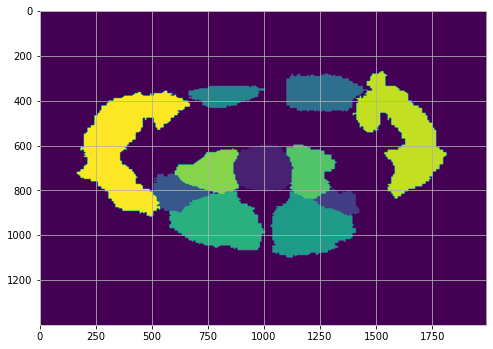

In [17]:
plt.imshow(data_.predicted)